# 导入数据

In [1]:
import pandas as pd
import numpy as np
import os
os.makedirs('results/img', exist_ok=True)
os.makedirs('results/model_weight', exist_ok=True)
os.makedirs('results/pred', exist_ok=True)
inputfile = 'feature_reg_CT.csv'
labelfile='label.csv'
data_feature=pd.read_csv(inputfile)
mean_values = data_feature.loc[:, data_feature.columns != 'ID'].mean()
data_feature.fillna(mean_values, inplace=True)
data_label=pd.read_csv(labelfile)
merged_data = pd.merge(data_feature, data_label, on='ID')
merged_data.columns = merged_data.columns.str.replace(r'-', '_')
merged_data

,ID,liver_exponential_firstorder_10Percentile,liver_exponential_firstorder_90Percentile,liver_exponential_firstorder_Energy,liver_exponential_firstorder_Entropy,liver_exponential_firstorder_InterquartileRange,liver_exponential_firstorder_Kurtosis,liver_exponential_firstorder_Maximum,liver_exponential_firstorder_Mean,liver_exponential_firstorder_MeanAbsoluteDeviation,...,spleen_wavelet_LLL_glszm_SmallAreaLowGrayLevelEmphasis,spleen_wavelet_LLL_glszm_ZoneEntropy,spleen_wavelet_LLL_glszm_ZonePercentage,spleen_wavelet_LLL_glszm_ZoneVariance,spleen_wavelet_LLL_ngtdm_Busyness,spleen_wavelet_LLL_ngtdm_Coarseness,spleen_wavelet_LLL_ngtdm_Complexity,spleen_wavelet_LLL_ngtdm_Contrast,spleen_wavelet_LLL_ngtdm_Strength,label
0,2.nii.gz,25.902639,32.818683,3.435874e+10,1.570290,2.989607,6.554846,47.636570,29.587833,2.302787,...,0.000064,7.715059,0.549086,4.843505,0.056980,0.000225,164272.50380,0.113874,9.835990,49.0
1,3.nii.gz,4.644867,5.249812,4.133643e+10,0.982962,0.303443,4.532175,6.216114,4.952588,0.190781,...,0.000067,7.582486,0.588109,2.868550,0.086372,0.000203,147416.27010,0.128431,7.137575,33.0
2,4.nii.gz,15.733920,19.269577,3.579794e+10,0.526102,1.704766,4.513213,24.261197,17.545257,1.117619,...,0.000058,7.439815,0.534413,5.300543,0.075669,0.000194,133722.34350,0.068135,10.728823,31.0
3,5.nii.gz,13.738533,16.977123,5.673389e+10,1.096303,1.554642,112.253193,83.040877,15.362054,1.113085,...,0.000055,7.830742,0.567300,3.801133,0.072088,0.000170,223070.78890,0.158277,9.321701,37.6
4,6.nii.gz,15.652570,19.540875,5.698374e+10,0.695951,1.829588,10.518356,35.484686,17.706053,1.280340,...,0.000057,7.733922,0.505691,8.513139,0.012711,0.000268,188448.35100,0.102681,25.913016,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,222.nii.gz,43.241717,49.421234,6.319166e+10,1.397967,2.950304,12.001137,71.471596,46.464786,2.181271,...,0.000096,7.593798,0.245619,839.562260,0.156196,0.000179,29485.81468,0.023567,5.113344,47.0
221,223.nii.gz,31.087458,35.688908,4.764073e+10,1.061920,2.146011,12.370832,54.330261,33.453985,1.663273,...,0.000112,7.419585,0.251164,1441.186006,0.242742,0.000167,21227.60838,0.026254,3.182046,36.0
222,224.nii.gz,25.296570,30.873617,4.126056e+10,1.241562,2.582521,18.733525,57.873108,28.330780,2.004327,...,0.000151,7.500645,0.393103,135.174141,0.114519,0.000281,54908.17408,0.101329,6.250767,37.0
223,225.nii.gz,22.996129,26.833088,4.702090e+10,1.193671,1.892753,10.746871,39.902239,25.103000,1.338736,...,0.000157,7.369115,0.319818,460.574478,0.215936,0.000240,23389.34460,0.043109,3.199948,49.0


'特征个数统计：'

glcm          748
firstorder    612
glrlm         544
glszm         544
gldm          476
ngtdm         169
shape          28
Name: count, dtype: int64

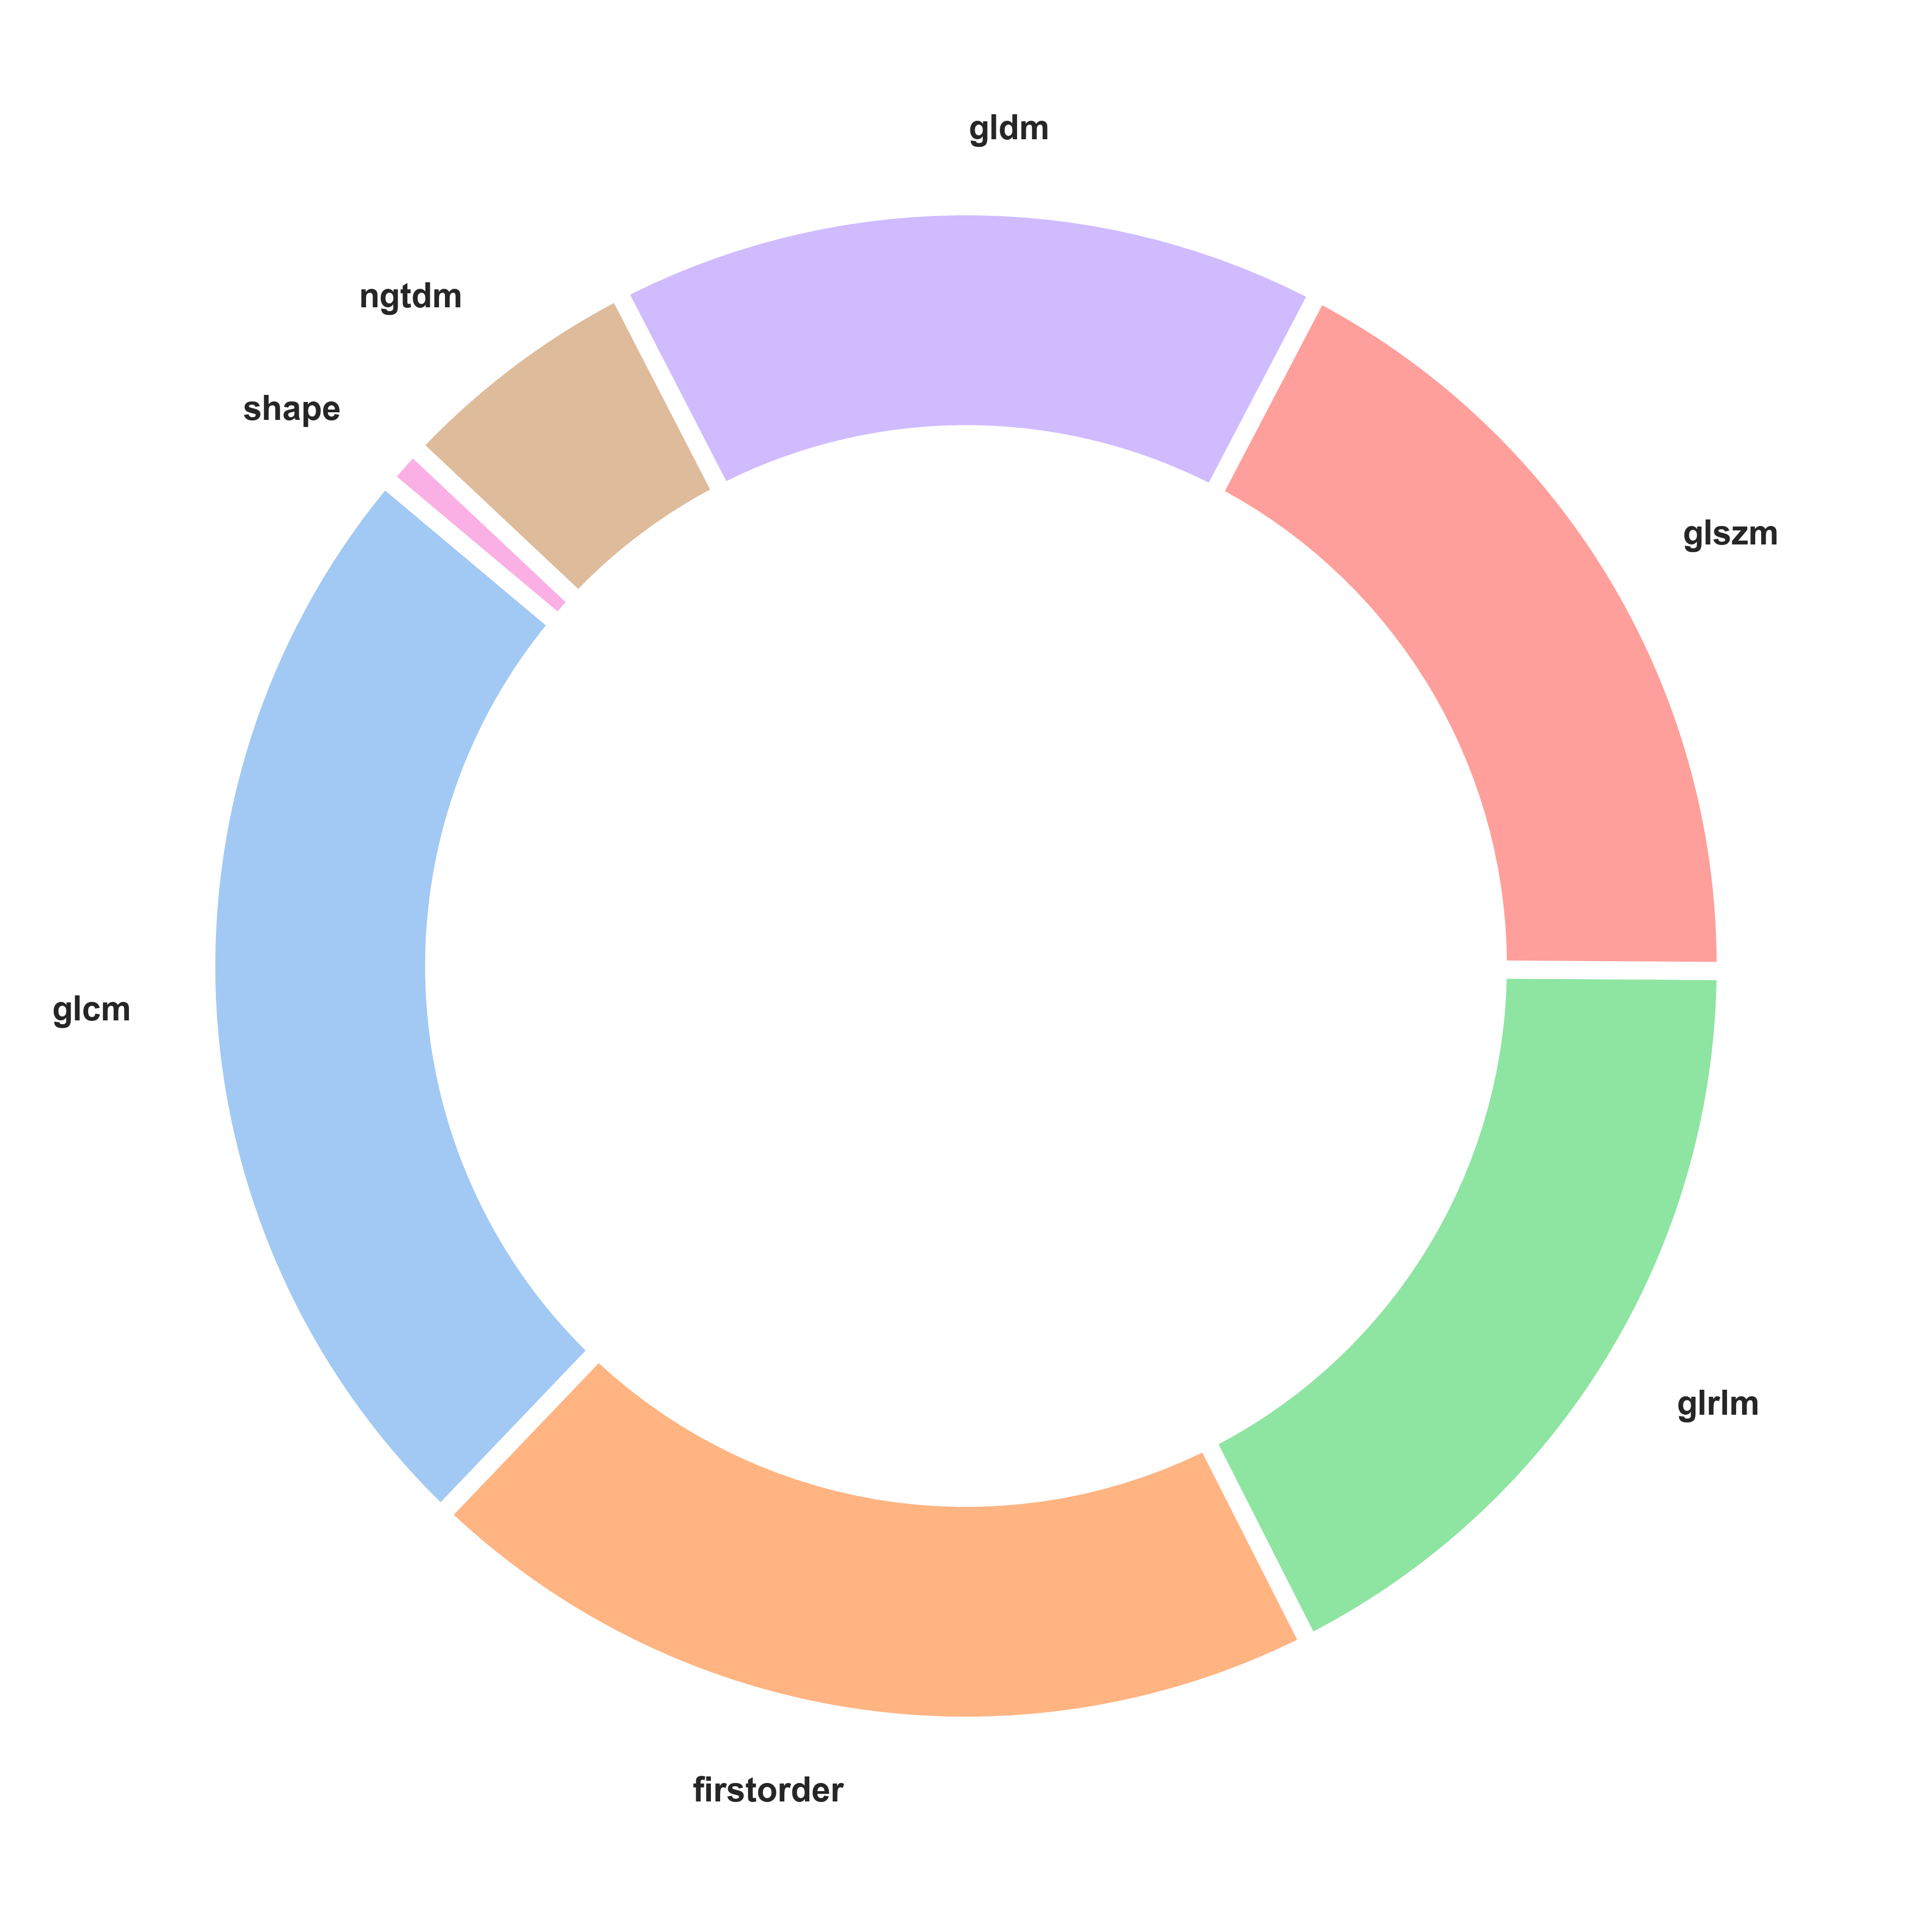

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 300
category_counts = merged_data.columns[1:-2].map(lambda x: x.split('_')[-2]).value_counts()
category_counts_percent = category_counts / category_counts.sum() * 100
display('特征个数统计：',category_counts)
# 设置Seaborn的风格
sns.set(style="whitegrid")
# 创建一个颜色调色板
colors = sns.color_palette('pastel')[0:len(category_counts_percent)]
# 创建3D效果的饼图
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(category_counts_percent, labels=category_counts_percent.index, autopct='%1.1f%%', startangle=140,
                                  colors=colors, wedgeprops=dict(width=0.3, edgecolor='w'))
# 添加阴影效果以增强立体感
for wedge in wedges:
    wedge.set_edgecolor('w')
    wedge.set_linewidth(8)
# 添加中心白色圆圈使其成为环形图
centre_circle = plt.Circle((0, 0), 0.2, fc='white', edgecolor='w')
fig.gca().add_artist(centre_circle)
# 调整文字和自动文字的样式
plt.setp(texts, size=15, weight="bold")
plt.setp(autotexts, size=10, weight="bold", color="white")
# 设置标题
#ax.set_title('特征大类所占比例', fontsize=16)
# 显示图表
plt.tight_layout()
plt.savefig('results/img/特征大类所占比例.svg')
plt.show()


数据集包含较多的异常值，使用稳键归一化（robust normalization）
value_result = (value-Media)/(Q1-Q3)  
Q1的位置 = 1 * （n + 1) / 4  
Q3的位置 =  3 *（n + 1) / 4  
n : 表示数据的个数。  
media : 中位数  
Q1 : 是第 1 个四分位数（第 25 个分位数）  
Q3 : 第 3 个四分位数（第 75 个分位数） 

method='robust' 稳键归一化,standard（z值标准化）,minmax（最大最小值标准化）

In [3]:
from pixelmed_calc.medical_imaging.RadiologyComponents.components1 import sel_standard_data
#method='robust',standard,minmax
merged_data = sel_standard_data(merged_data, merged_data.columns[1:-2],method='robust')
merged_data

,ID,liver_exponential_firstorder_10Percentile,liver_exponential_firstorder_90Percentile,liver_exponential_firstorder_Energy,liver_exponential_firstorder_Entropy,liver_exponential_firstorder_InterquartileRange,liver_exponential_firstorder_Kurtosis,liver_exponential_firstorder_Maximum,liver_exponential_firstorder_Mean,liver_exponential_firstorder_MeanAbsoluteDeviation,...,spleen_wavelet_LLL_glszm_SmallAreaLowGrayLevelEmphasis,spleen_wavelet_LLL_glszm_ZoneEntropy,spleen_wavelet_LLL_glszm_ZonePercentage,spleen_wavelet_LLL_glszm_ZoneVariance,spleen_wavelet_LLL_ngtdm_Busyness,spleen_wavelet_LLL_ngtdm_Coarseness,spleen_wavelet_LLL_ngtdm_Complexity,spleen_wavelet_LLL_ngtdm_Contrast,spleen_wavelet_LLL_ngtdm_Strength,label
0,2.nii.gz,0.355250,0.413329,-0.444876,0.772246,0.727145,-0.479557,0.079596,0.391991,0.669578,...,-0.487004,0.280029,0.423422,-0.036962,-0.138017,-0.274084,0.511607,0.226987,9.835990,49.0
1,3.nii.gz,-0.964177,-1.071891,0.080311,-0.189609,-1.588216,-0.762065,-1.032831,-1.027697,-1.319457,...,-0.468538,-0.097208,0.557201,-0.040542,0.071934,-0.393163,0.429452,0.365719,7.137575,33.0
2,4.nii.gz,-0.275902,-0.316603,-0.336552,-0.937799,-0.380335,-0.764714,-0.548195,-0.302003,-0.446583,...,-0.540642,-0.503182,0.373119,-0.036133,-0.004519,-0.442553,0.362709,-0.208926,10.728823,31.0
3,5.nii.gz,-0.399751,-0.440104,1.239228,-0.003993,-0.509735,14.283435,1.030447,-0.427817,-0.450854,...,-0.574056,0.609208,0.485862,-0.038851,-0.030100,-0.576994,0.798184,0.650156,9.321701,37.6
4,6.nii.gz,-0.280951,-0.301987,1.258034,-0.659641,-0.272743,0.074030,-0.246767,-0.292736,-0.293337,...,-0.549435,0.333703,0.274657,-0.030310,-0.454244,-0.034598,0.629438,0.120308,25.913016,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,222.nii.gz,1.431451,1.307760,1.725283,0.490035,0.693268,0.281132,0.719732,1.364582,0.555138,...,-0.213535,-0.065021,-0.616918,1.476123,0.570706,-0.527311,-0.145329,-0.633669,5.113344,47.0
221,223.nii.gz,0.677061,0.567957,0.554816,-0.060301,0.000000,0.332768,0.259368,0.614791,0.067300,...,-0.066406,-0.560746,-0.597910,2.566679,1.188927,-0.594489,-0.185578,-0.608059,3.182046,36.0
222,224.nii.gz,0.317633,0.308543,0.074601,0.233894,0.376254,1.221451,0.354518,0.319549,0.388496,...,0.275113,-0.330089,-0.111314,0.199287,0.272995,0.037568,-0.021423,0.107423,6.250767,37.0
223,225.nii.gz,0.174849,0.090867,0.508163,0.155465,-0.218297,0.105947,-0.128125,0.133538,-0.238341,...,0.330484,-0.704360,-0.362550,0.789136,0.997443,-0.190283,-0.175042,-0.447430,3.199948,49.0


## F检验筛选特征

多组比较：F检验通常用于分析方差分析（ANOVA），它可以同时比较三个或更多的组别。而T检验通常用于两组数据的比较。 
 方差齐性检验：在进行T检验之前，通常需要先检验数据的方差是否齐性。F检验可以直接用于检验方差是否相等，这是T检验无法做到的。  
 控制类型I错误：在进行多重比较的情况下，T检验可能会增加犯类型I错误的风险。而F检验通过调整P值，可以更好地控制这一风险。  
 更广泛的适用性：F检验不仅限于两样本均值的比较，它还适用于多个样本均值的比较，以及因子水平的比较。  
 实验设计：F检验可以应用于完全随机设计、随机区组设计、拉丁方设计等多种实验设计，而T检验通常只适用于两组独立样本或配对样本。  
 多重比较问题：当涉及到多个比较时，F检验可以通过调整方法（如Bonferroni校正）来控制整体错误率，而T检验在多重比较时可能需要更复杂的方法来控制错误率。  
 统计功效：在某些情况下，F检验可能具有比T检验更高的统计功效，尤其是在样本量较大时。  
 非正态分布数据：虽然T检验和F检验都假设数据正态分布，但在实际应用中，F检验对于数据分布的正态性要求可能稍微宽松一些。  


 method='f_test',t_test,chi2_test

In [4]:
from pixelmed_calc.medical_imaging.RadiologyComponents.components1 import select_significant_features

significant_features_sel, feature_scores=select_significant_features(merged_data, label_column='label', columns=merged_data.columns[1:-2],significance_level=0.05,method='f_test')
feature_scores

,Feature,F_value,p_value,Category
0,liver_exponential_firstorder_10Percentile,1.063833,0.378552,firstorder
1,liver_exponential_firstorder_90Percentile,1.051117,0.398089,firstorder
2,liver_exponential_firstorder_Energy,1.217544,0.186782,firstorder
3,liver_exponential_firstorder_Entropy,1.082942,0.350121,firstorder
4,liver_exponential_firstorder_InterquartileRange,1.118750,0.300133,firstorder
...,...,...,...,...
3116,spleen_wavelet_LLL_glszm_ZoneVariance,0.570336,0.985072,glszm
3117,spleen_wavelet_LLL_ngtdm_Busyness,1.554225,0.023974,ngtdm
3118,spleen_wavelet_LLL_ngtdm_Coarseness,1.013651,0.458130,ngtdm
3119,spleen_wavelet_LLL_ngtdm_Complexity,1.577516,0.020396,ngtdm


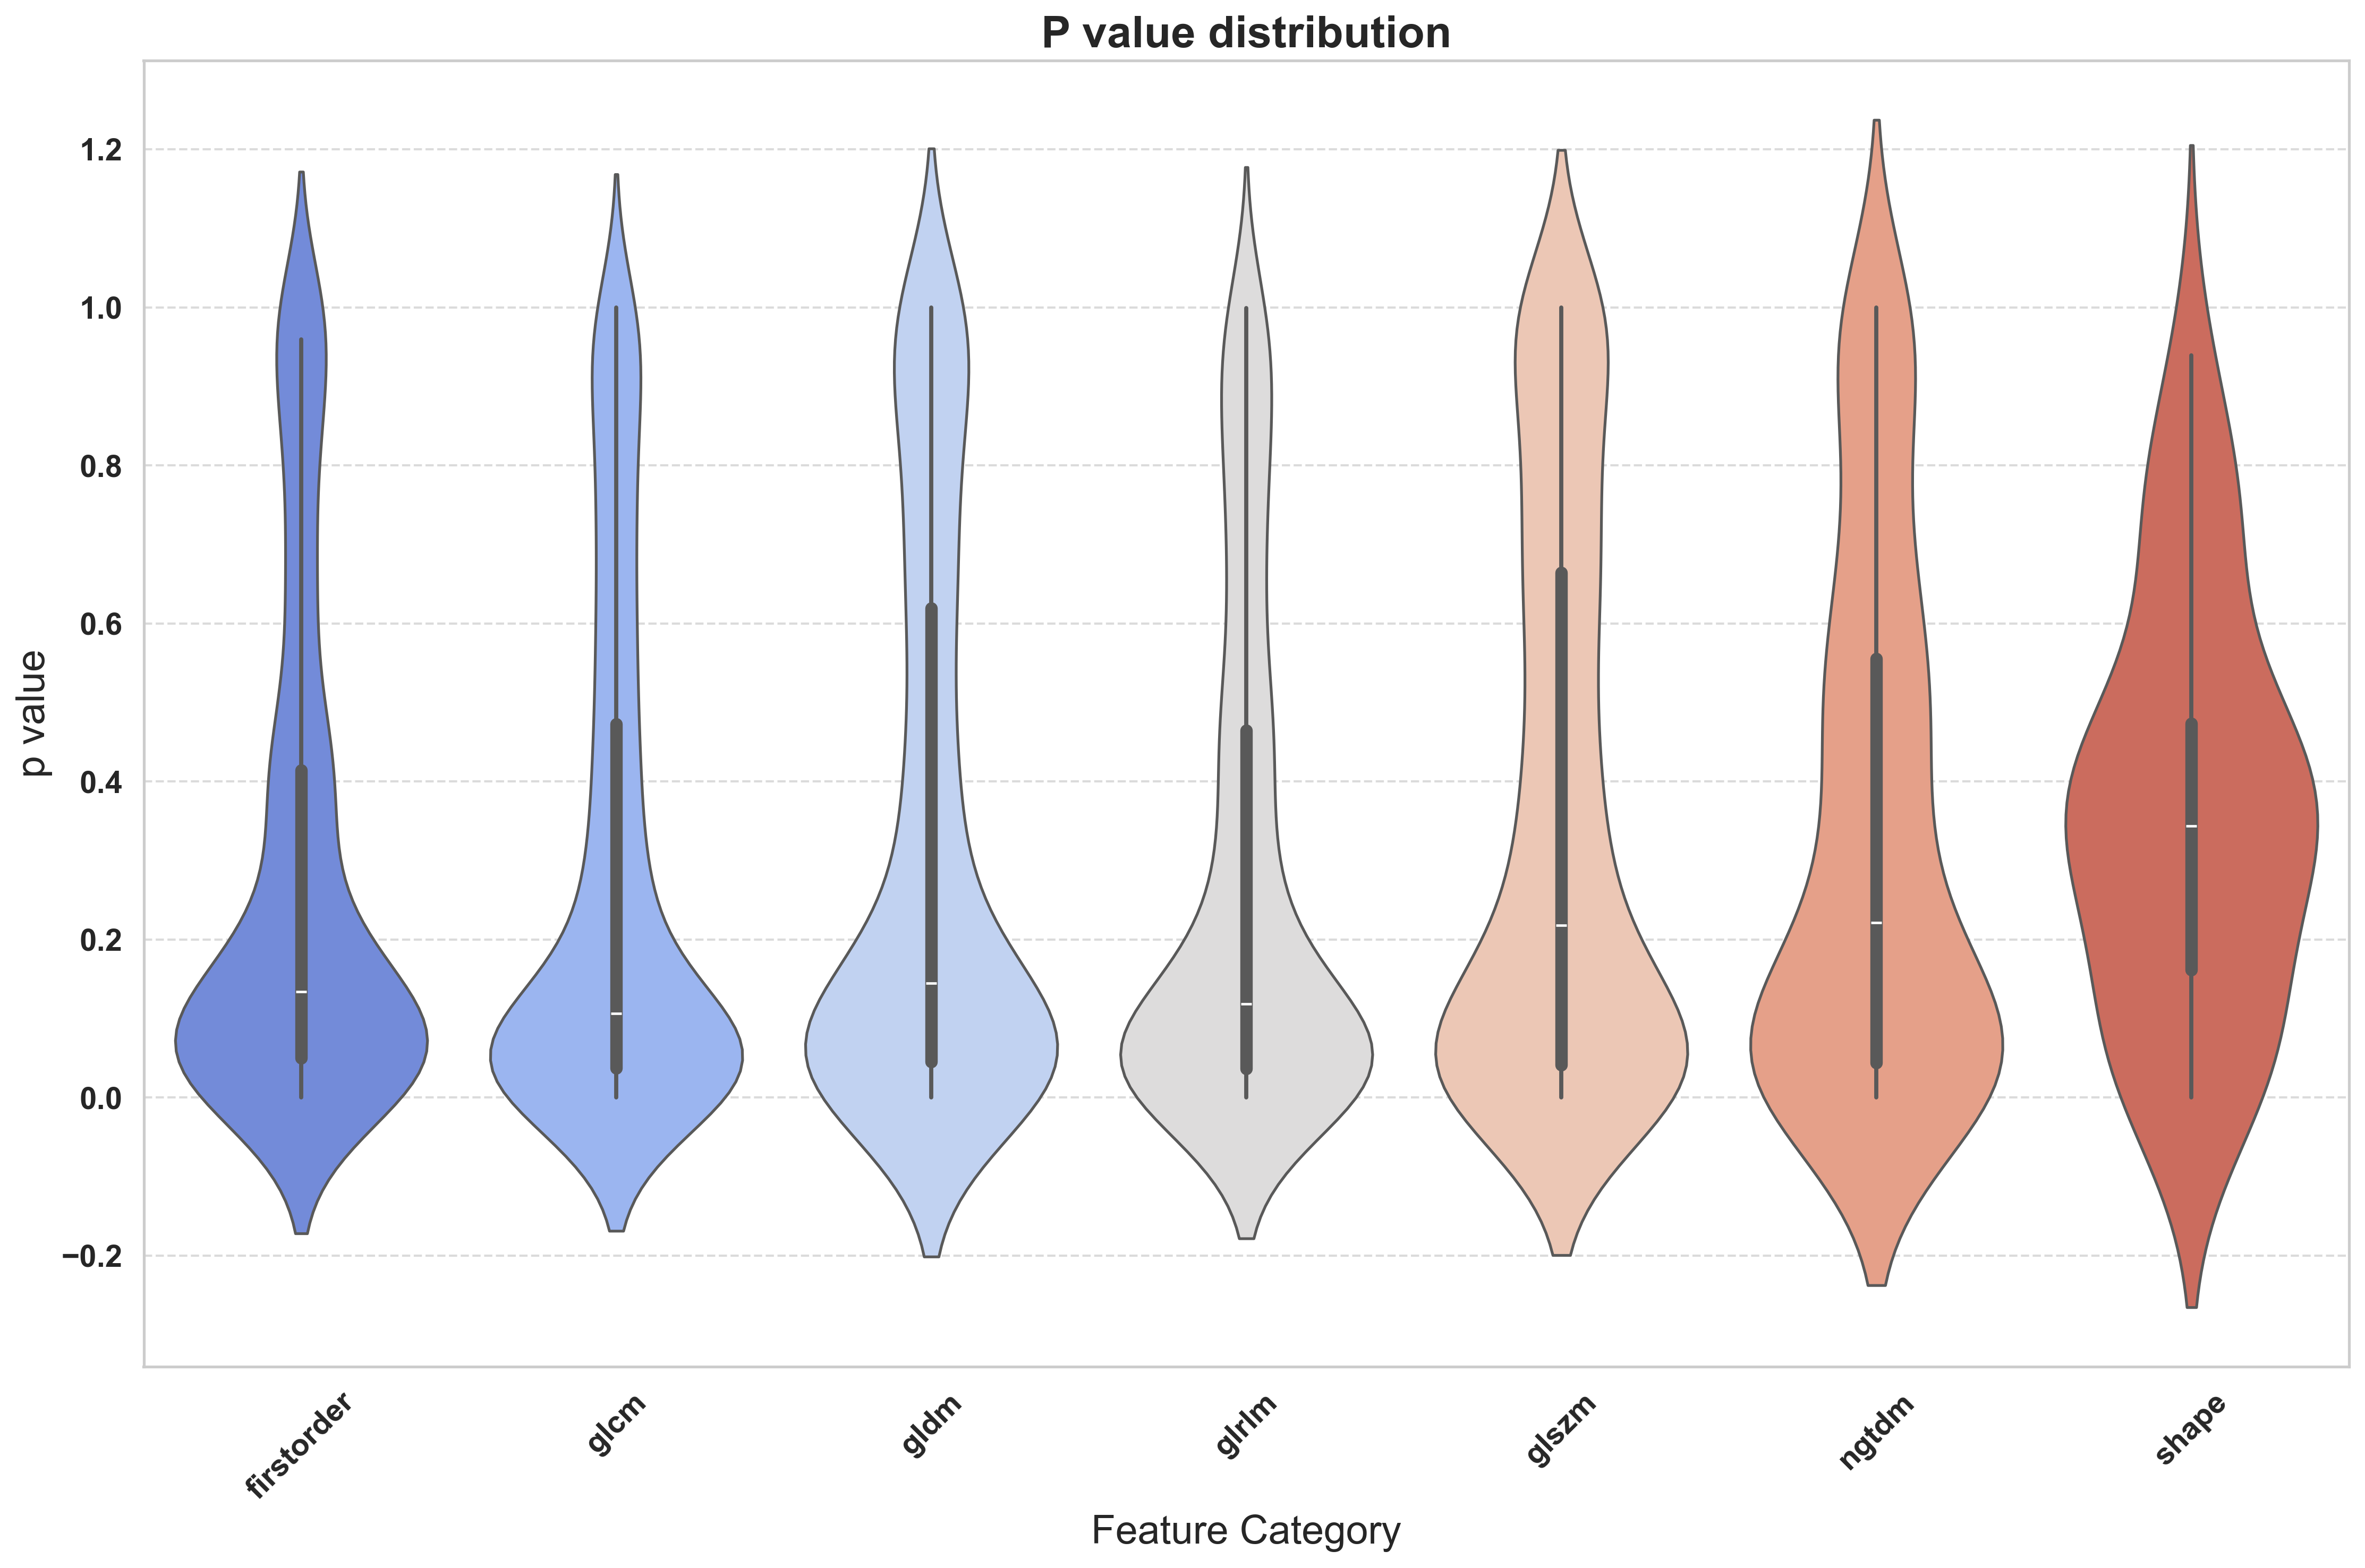

In [5]:
sns.set(style="whitegrid")
# 使用Seaborn绘制小提琴图
plt.figure(figsize=(15, 10))
# 使用不同的调色板，并将x变量分配给hue，关闭图例显示
sns.violinplot(x='Category', y='p_value', data=feature_scores, hue='Category', palette="coolwarm", legend=False)
# 添加水平网格线以提高图形的可读性
plt.grid(axis='y', linestyle='--', alpha=0.7)
# 设置标题和坐标标签的字体大小和风格
plt.title('P value distribution', fontsize=20, weight='bold')
plt.xlabel('Feature Category', fontsize=18)
plt.ylabel('p value', fontsize=18)
# 调整x轴标签的字体大小并旋转
plt.xticks(fontsize=14, rotation=45, weight='bold')
# 调整y轴标签的字体大小
plt.yticks(fontsize=14, weight='bold')
# 移动图例的位置并调整字体大小（由于关闭了图例显示部分，不再需要）
# plt.legend(title='特征大类', title_fontsize='13', loc='upper right', fontsize='11')
# 添加紧凑布局以防止图形元素重叠
plt.tight_layout()
# 显示图表
plt.show()

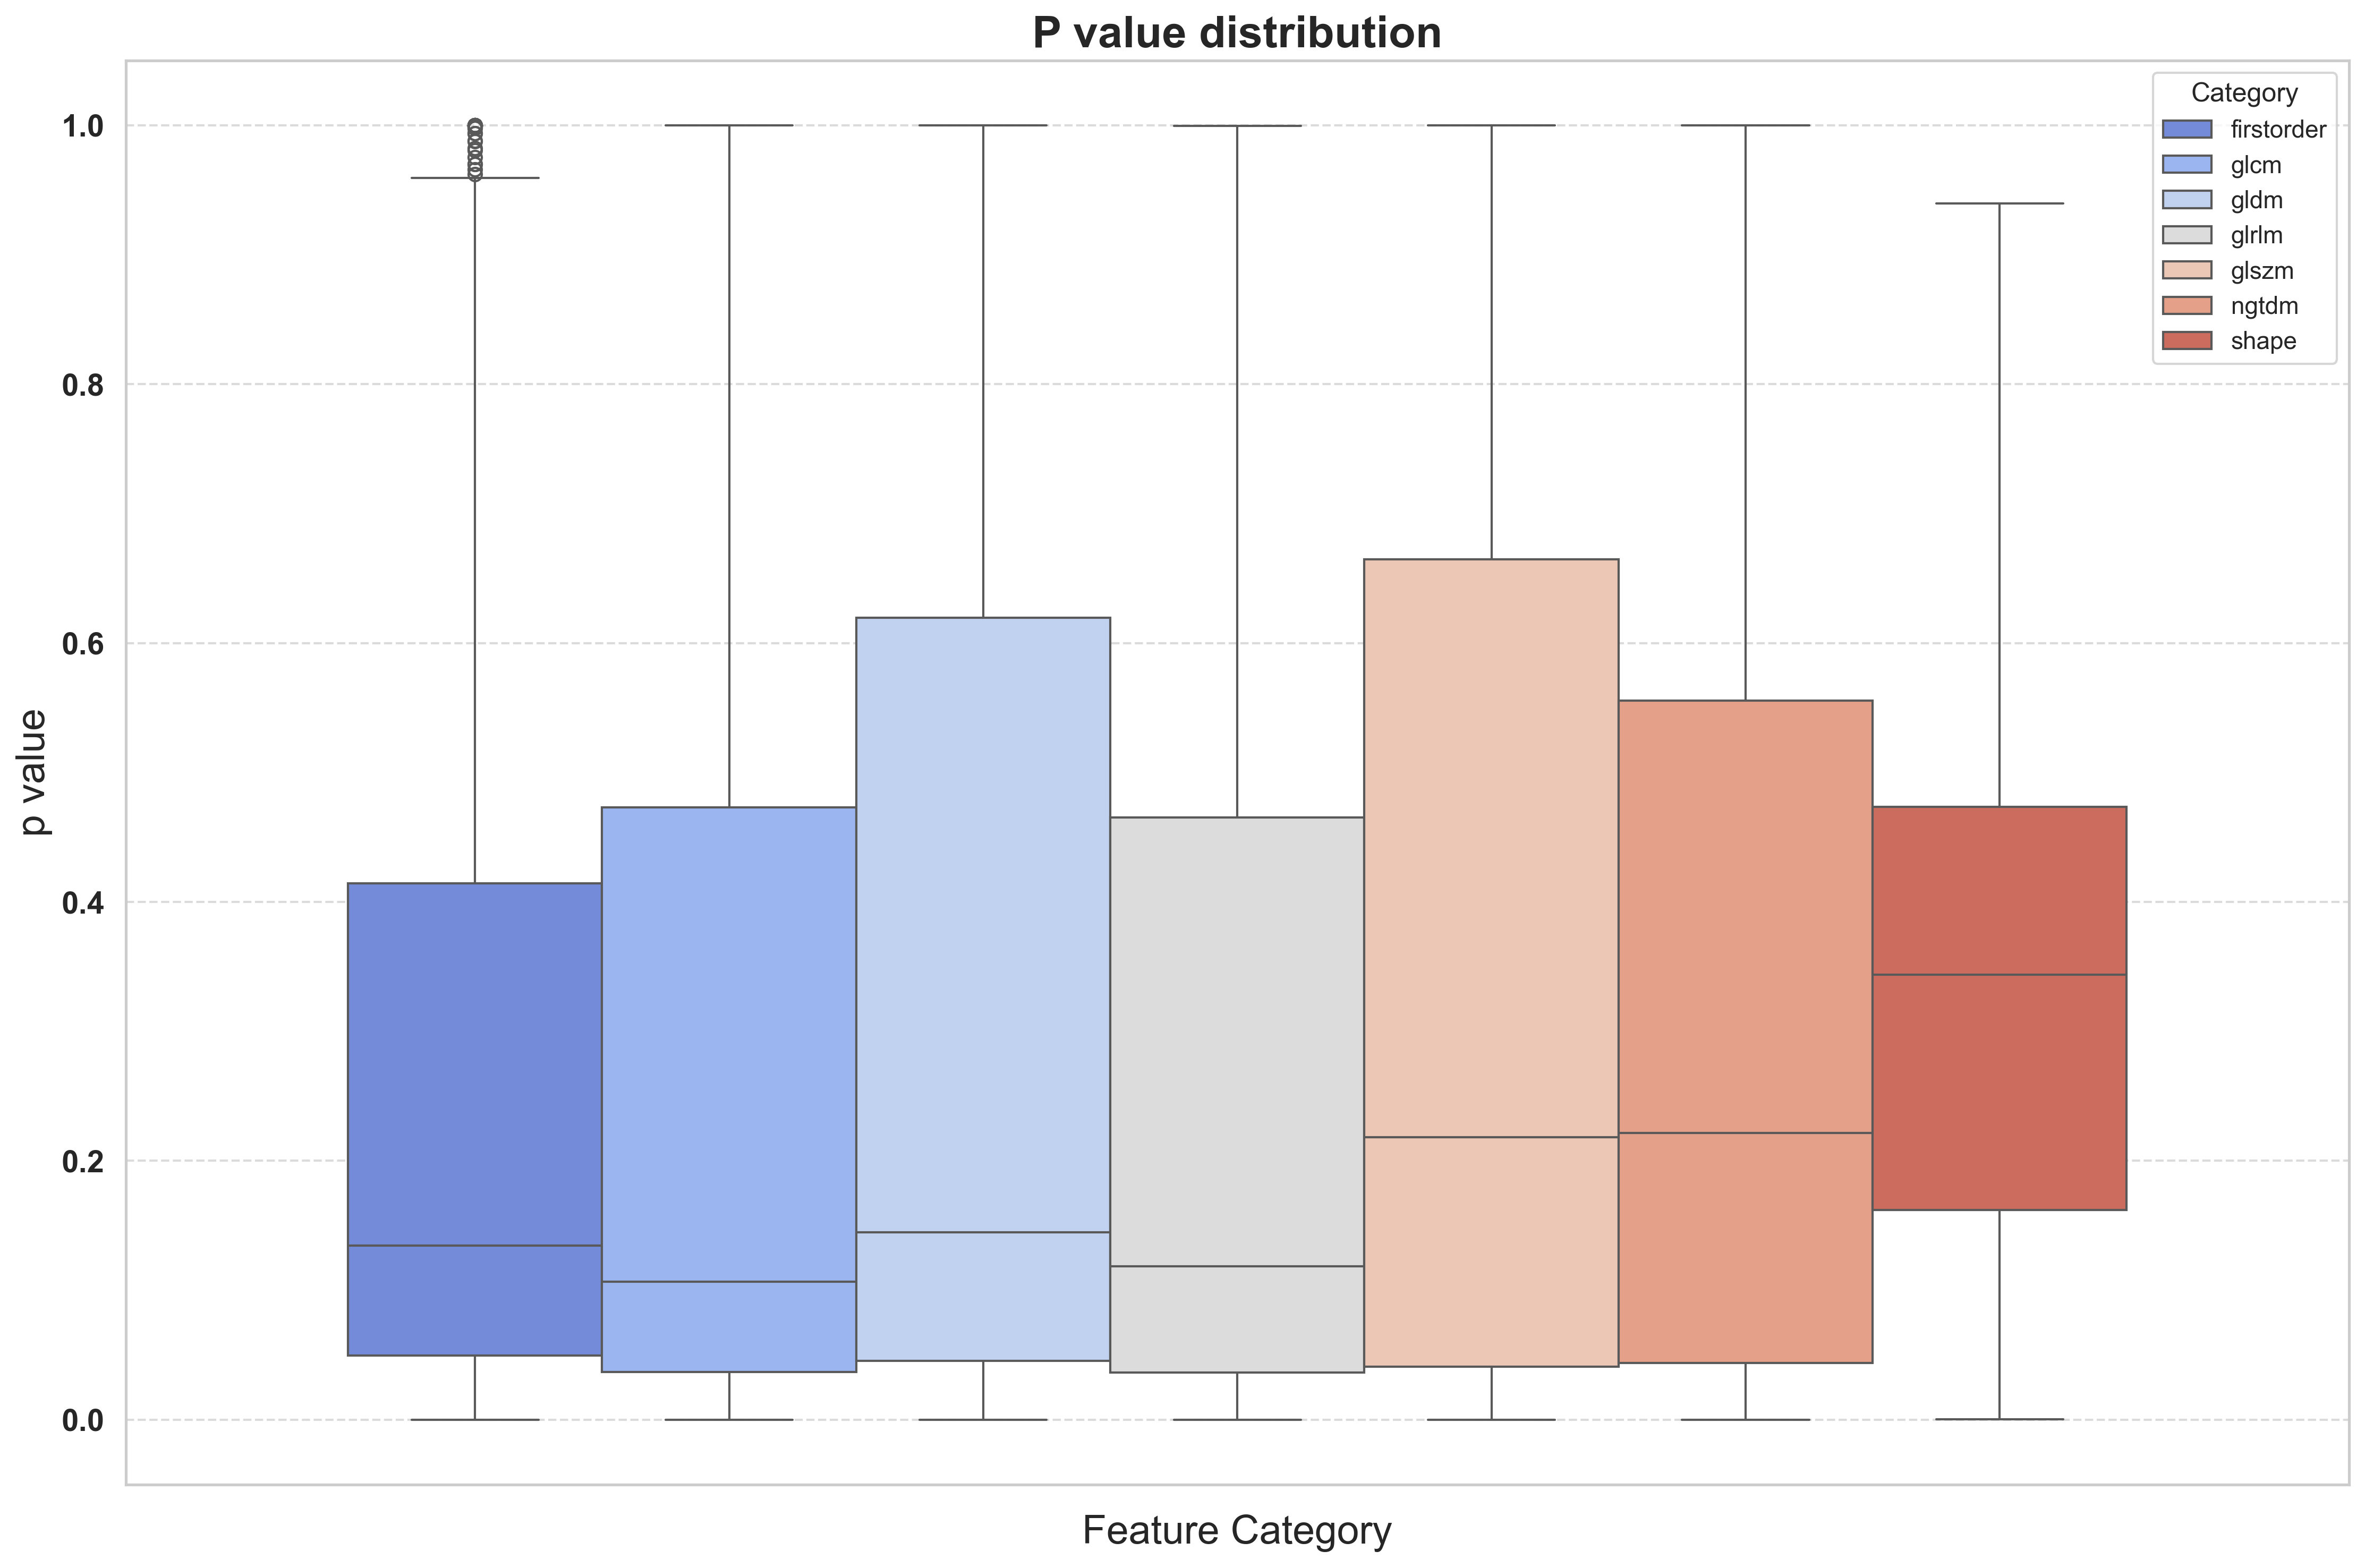

In [6]:
sns.set(style="whitegrid")
# 使用 Seaborn 绘制箱线图
plt.figure(figsize=(15, 10))
# 使用不同的调色板，并将 x 变量分配给 hue，关闭图例显示
sns.boxplot(hue='Category', y='p_value', data=feature_scores, palette="coolwarm")
# 添加水平网格线以提高图形的可读性
plt.grid(axis='y', linestyle='--', alpha=0.7)
# 设置标题和坐标标签的字体大小和风格
plt.title('P value distribution', fontsize=20, weight='bold')
plt.xlabel('Feature Category', fontsize=18)
plt.ylabel('p value', fontsize=18)

# 调整 x 轴标签的字体大小并旋转
plt.xticks(fontsize=14, rotation=45, weight='bold')
# 调整 y 轴标签的字体大小
plt.yticks(fontsize=14, weight='bold')
# 添加紧凑布局以防止图形元素重叠
plt.tight_layout()
# 显示图表
plt.show()

In [7]:
# 计算 Pearson 相关系数矩阵
correlation_matrix = merged_data[significant_features_sel].corr('pearson')
#correlation_matrix = merged_data[significant_features_sel].corr('spearman')

# 标记高相关性的特征对
high_corr_pairs = np.where(np.abs(correlation_matrix) > 0.7)
high_corr_pairs = [(correlation_matrix.index[x], correlation_matrix.columns[y]) for x, y in zip(*high_corr_pairs) if x != y and x < y]

# 创建一个集合来存储需要移除的特征
features_to_remove = set()

# 遍历高相关性特征对，添加一个特征到需要移除的集合中
for (feature1, feature2) in high_corr_pairs:
    features_to_remove.add(feature2)

# 创建新的显著特征列表，移除高相关性的特征
final_significant_features = [feature for feature in significant_features_sel if feature not in features_to_remove]

# 输出最终的特征列表
print(f"最终筛选的特征数量: {len(final_significant_features)}")
print(final_significant_features)

# 输出需要移除的特征
print(f"移除的特征: {features_to_remove}")

# 将最终筛选的特征数据保存到 merged_data_final
#merged_data_final = merged_data[['ID', 'label'] + final_significant_features]

最终筛选的特征数量: 33
['liver_exponential_glcm_Idmn', 'liver_exponential_gldm_LargeDependenceLowGrayLevelEmphasis', 'liver_exponential_glszm_SizeZoneNonUniformityNormalized', 'liver_exponential_glszm_SmallAreaEmphasis', 'liver_gradient_firstorder_10Percentile', 'liver_gradient_glcm_Idmn', 'liver_gradient_ngtdm_Coarseness', 'liver_log_sigma_3_0_mm_3D_glcm_Idmn', 'liver_original_shape_MajorAxisLength', 'liver_original_shape_Sphericity', 'liver_wavelet_HHL_firstorder_Mean', 'liver_wavelet_HLH_glcm_Idmn', 'liver_wavelet_HLL_firstorder_Maximum', 'liver_wavelet_HLL_glcm_Idmn', 'liver_wavelet_HLL_gldm_SmallDependenceLowGrayLevelEmphasis', 'liver_wavelet_LLH_firstorder_Skewness', 'liver_wavelet_LLH_glcm_Idmn', 'liver_wavelet_LLH_gldm_SmallDependenceLowGrayLevelEmphasis', 'liver_wavelet_LLL_firstorder_Minimum', 'spleen_exponential_gldm_LargeDependenceLowGrayLevelEmphasis', 'spleen_exponential_glszm_LargeAreaHighGrayLevelEmphasis', 'spleen_exponential_ngtdm_Coarseness', 'spleen_exponential_ngtdm_Strengt

In [8]:
data_sel=merged_data[list(final_significant_features)+['label','ID']]
data_sel

,liver_exponential_glcm_Idmn,liver_exponential_gldm_LargeDependenceLowGrayLevelEmphasis,liver_exponential_glszm_SizeZoneNonUniformityNormalized,liver_exponential_glszm_SmallAreaEmphasis,liver_gradient_firstorder_10Percentile,liver_gradient_glcm_Idmn,liver_gradient_ngtdm_Coarseness,liver_log_sigma_3_0_mm_3D_glcm_Idmn,liver_original_shape_MajorAxisLength,liver_original_shape_Sphericity,...,spleen_original_firstorder_Minimum,spleen_wavelet_HHH_glszm_SizeZoneNonUniformityNormalized,spleen_wavelet_HLH_glcm_Idmn,spleen_wavelet_HLL_firstorder_Kurtosis,spleen_wavelet_LHH_glcm_Correlation,spleen_wavelet_LHL_firstorder_Kurtosis,spleen_wavelet_LHL_glcm_ClusterShade,spleen_wavelet_LLH_glcm_Idmn,label,ID
0,-0.971617,-0.481318,1.098086,-2.144950,0.641552,-0.126748,0.700331,-0.227802,0.225497,-1.169213,...,1.203144,-1.160699,-0.063845,0.120567,-0.977353,-0.251799,0.486993,0.741936,49.0,2.nii.gz
1,-18.050683,3.175008,1.776240,-1.980123,0.933024,0.843675,0.159817,0.536306,-0.390153,-0.030032,...,1.256416,-0.978679,0.084725,0.810825,-1.190334,1.444558,6.907233,-2.393407,33.0,3.nii.gz
2,-1.173290,2.646428,1.282743,-2.089317,0.624255,0.966083,0.636269,-0.174479,-0.221717,0.282151,...,0.952396,-1.468270,-0.799013,0.070374,-0.731296,0.942648,0.986743,0.793531,31.0,4.nii.gz
3,1.043041,-0.248593,1.835628,-1.899749,0.670008,0.611496,-0.786763,0.543550,2.827392,-1.153091,...,-0.872532,-0.638381,-0.094864,0.127327,-0.850959,0.976993,1.604511,0.539505,37.6,5.nii.gz
4,0.574077,0.676366,0.855456,-2.233789,0.517798,0.795706,-0.455022,0.981727,0.453991,-0.083331,...,-11.496909,-0.330352,0.236485,0.435422,-1.011527,0.988607,-5.913907,0.472577,51.0,6.nii.gz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.261450,-0.508436,0.033608,0.024534,-0.207675,0.075402,-1.049319,0.394766,-0.019540,0.401426,...,0.520214,0.002351,0.633554,4.677532,0.112196,1.134631,-0.642627,0.464112,47.0,222.nii.gz
221,0.365733,-0.343370,-0.196069,0.343928,-0.174974,-0.273494,-0.573558,0.525634,0.025697,0.046722,...,-0.136893,-0.152243,-0.859261,0.767741,0.111973,2.133085,-0.247826,0.673697,36.0,223.nii.gz
222,0.331402,-0.193026,-0.247959,-0.066080,0.050398,0.918022,0.209893,0.730424,0.773988,0.071739,...,-0.517517,-0.121631,-1.308458,-0.484680,0.494794,0.086406,0.144796,0.090184,37.0,224.nii.gz
223,-1.286698,-0.223270,0.833721,0.762174,-0.149589,0.632692,-0.352052,0.821111,0.323370,-0.273086,...,-0.858274,0.074326,-1.636745,-0.062921,0.401352,0.340022,-0.004139,0.388879,49.0,225.nii.gz


In [9]:
x_train=data_sel.drop(['label','ID'],axis=1)[0:180]
y_train=data_sel['label'][0:180]

x_test=data_sel.drop(['label','ID'],axis=1)[180:]
y_test=data_sel['label'][180:]

x_all=data_sel.drop(['label','ID'],axis=1)
y_all=data_sel['label']

In [10]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from pixelmed_calc.medical_imaging.RadiologyComponents.components1 import find_best_alpha
alphas = np.logspace(-6,2,50)
best_alpha,scores_lasso,scores_std_lasso=find_best_alpha(x_train, y_train,alphas=alphas,cv=10, max_iter=1000)

lasso = Lasso(alpha=best_alpha)
lasso.fit(x_train, y_train)
# 输出系数
lasso_coefs = lasso.coef_
# 创建 DataFrame 显示特征名和对应的系数
coef_df = pd.DataFrame({'feature': x_train.columns, 'coef': lasso_coefs})
selected_features = coef_df[abs(coef_df['coef']) > 1e-4]
# 创建 DataFrame 显示特征名和对应的系数
print(f"选择的特征:\n{selected_features}")
lasso_sel_cloumn=selected_features['feature']

选择的特征:
                                 feature      coef
21   spleen_exponential_ngtdm_Coarseness  0.002513
23  spleen_logarithm_firstorder_Kurtosis  0.003429


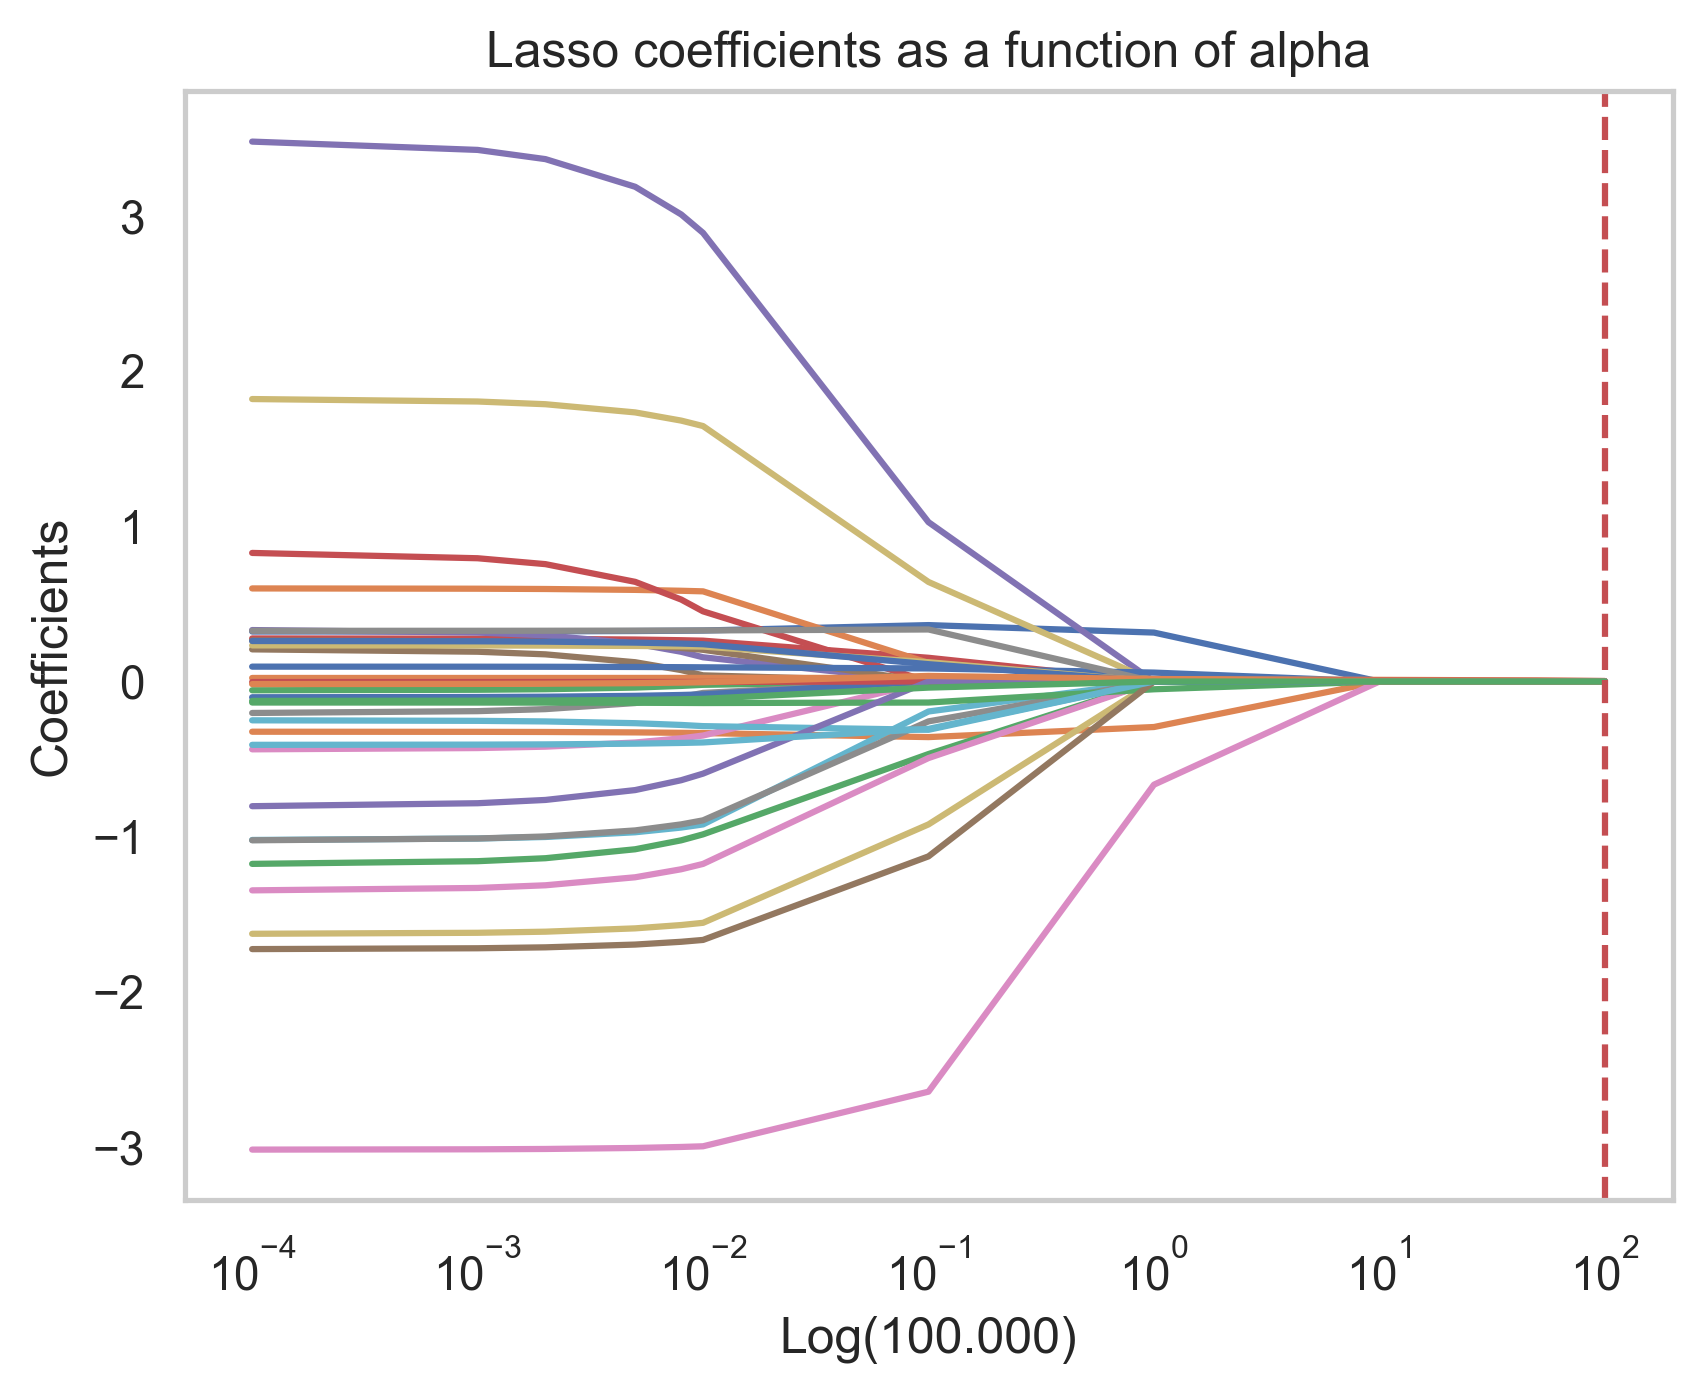

In [11]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
plt.rcParams['figure.dpi'] = 300
# 设置不同的alpha值范围
alpha_values = [0.0001,0.001,0.002,0.005,0.008,0.01,0.1,1,10,50,100]#alphas
lasso = Lasso(max_iter=1000)
coefs = []
num_nonzero_coefs = []
for a in alpha_values:
    lasso.set_params(alpha=a)
    lasso.fit(x_train, y_train)
    coefs.append(lasso.coef_)
    num_nonzero_coefs.append(np.sum(lasso.coef_ != 0))
ax = plt.gca()
ax.plot(alpha_values, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel(f'Log({best_alpha:.3f})')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients as a function of alpha')
plt.axvline(x=best_alpha, linestyle='--', color='r')
plt.grid(False)
plt.show()


平均分数计算：在完成所有交叉验证迭代后，GridSearchCV会计算每个参数组合在所有测试集上的平均得分。

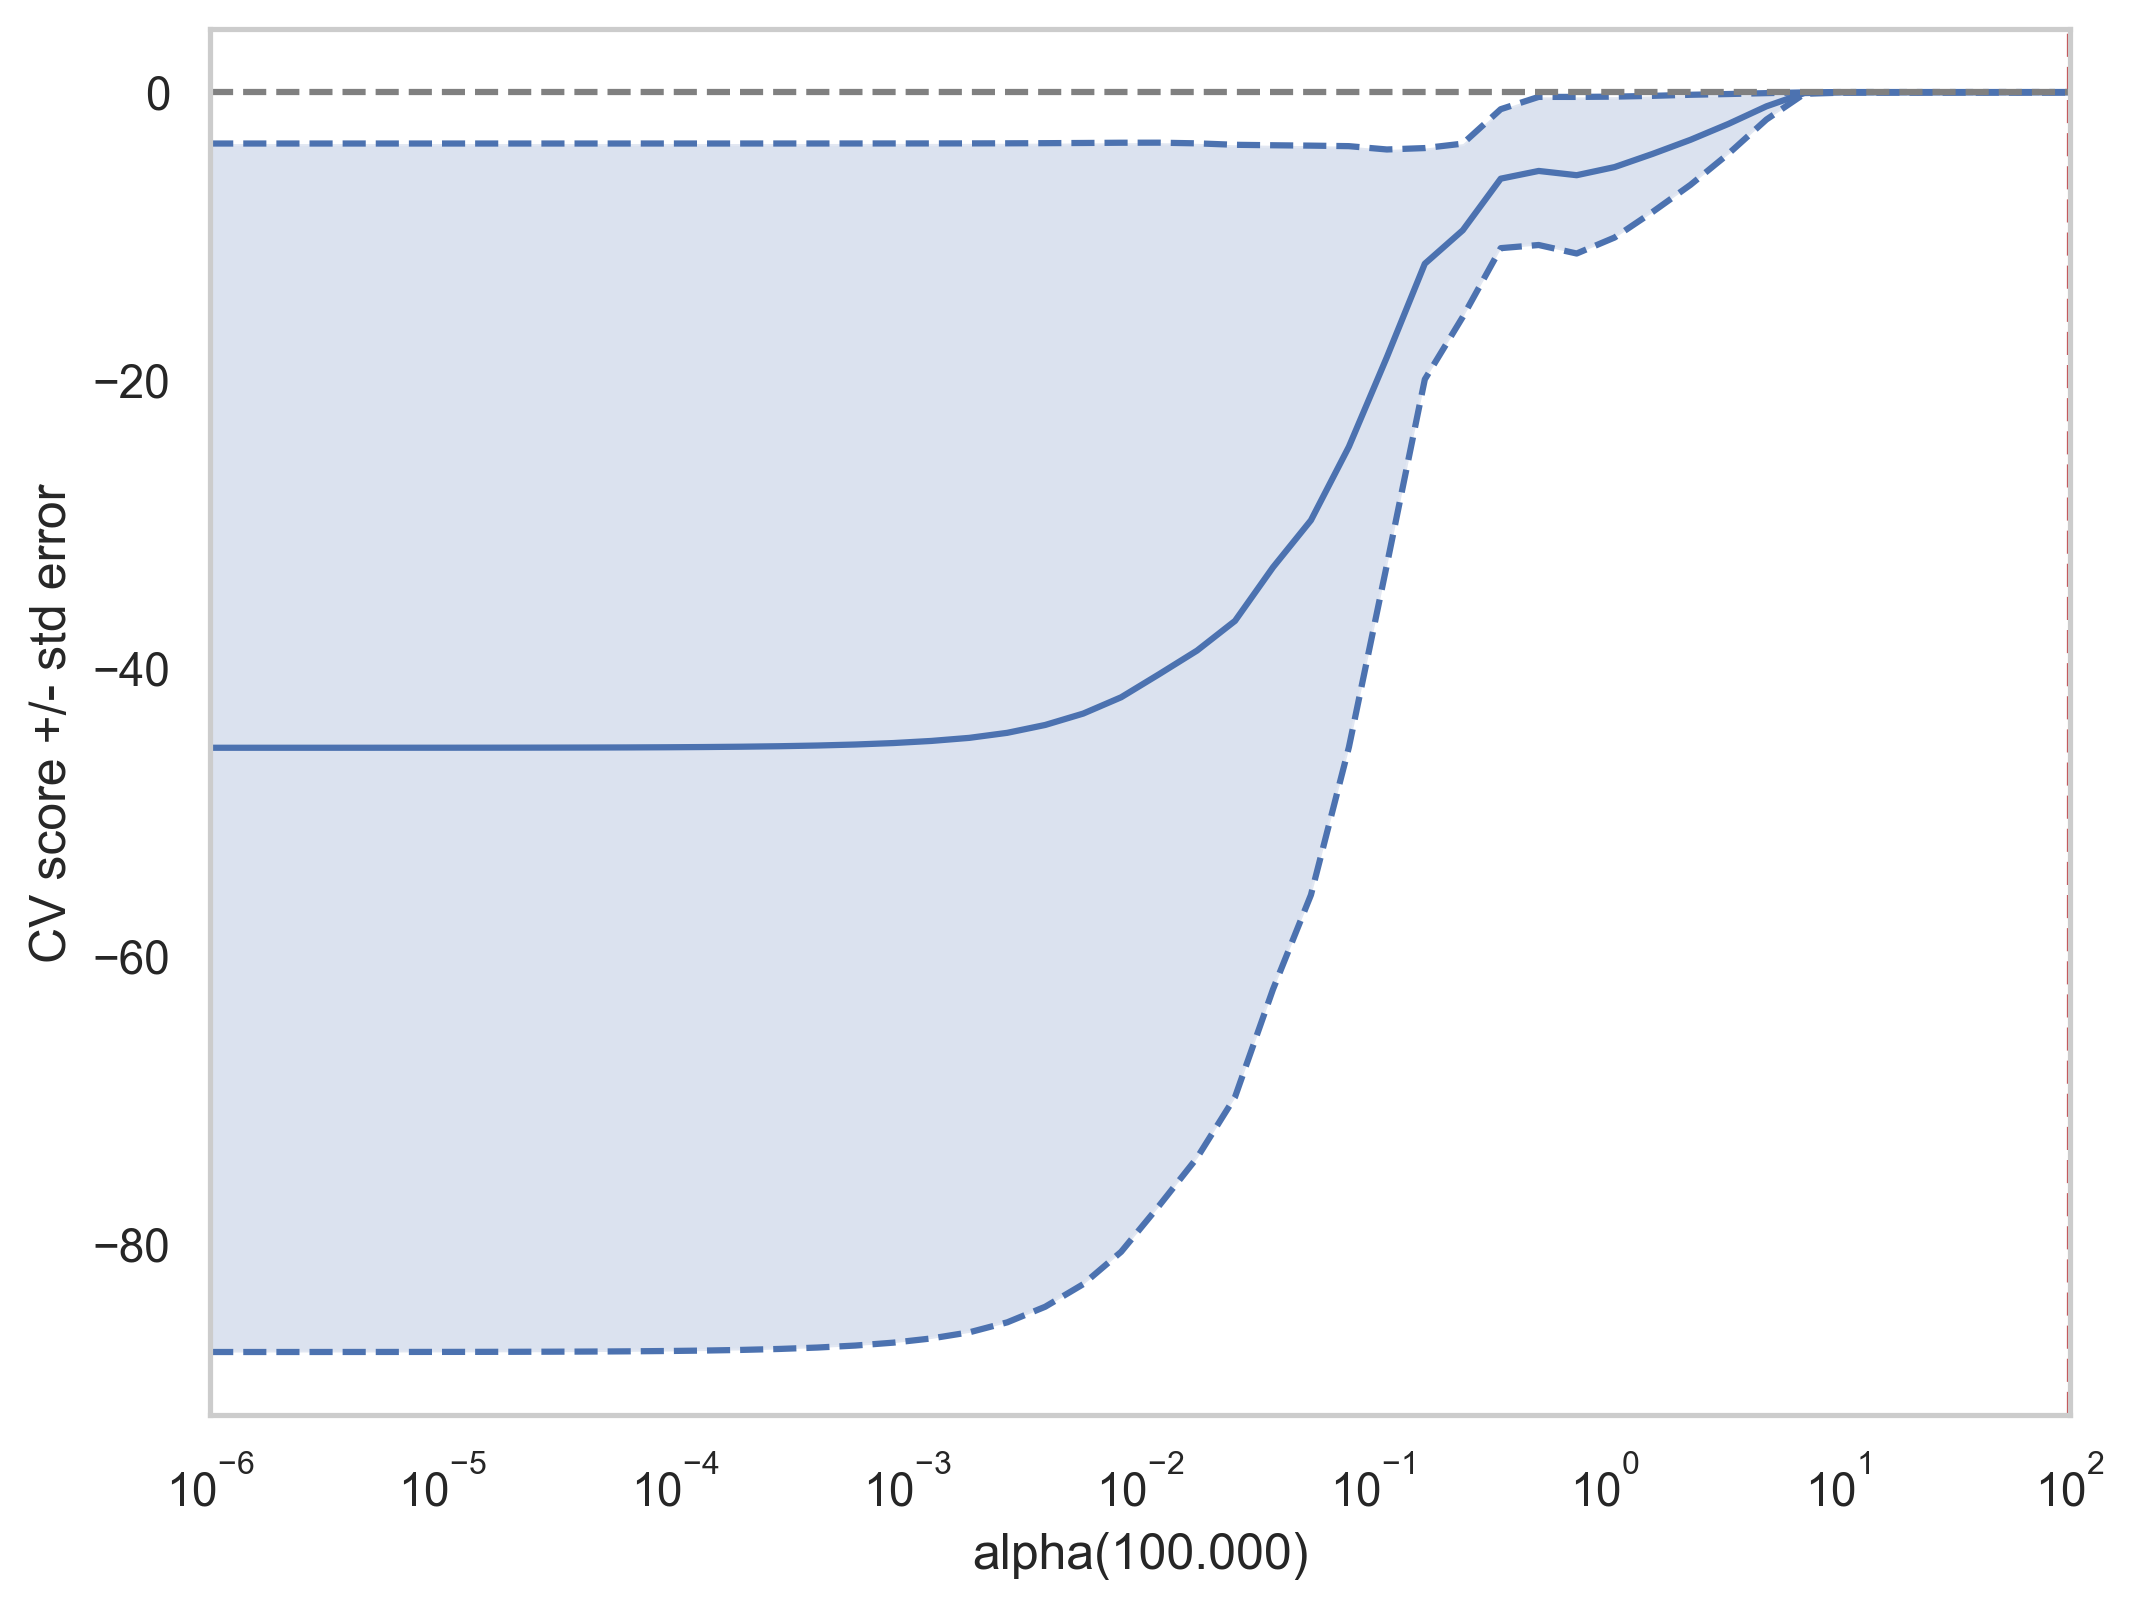

In [12]:

plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores_lasso)
# 显示误差线，显示+/-标准。 分数错误
std_error = scores_std_lasso / np.sqrt(10)
plt.semilogx(alphas, scores_lasso + std_error, 'b--')
plt.semilogx(alphas, scores_lasso - std_error, 'b--')
# alpha = 0.2控制填充颜色的半透明性
plt.fill_between(alphas, scores_lasso + std_error, scores_lasso - std_error, alpha=0.2)
plt.axvline(x=best_alpha, linestyle='--', color='r')
plt.ylabel('CV score +/- std error')
plt.xlabel(f'alpha({best_alpha:.3f})')
plt.axhline(np.max(scores_lasso), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.grid(False)
plt.show()

In [13]:
x_train=x_train[lasso_sel_cloumn]
x_test=x_test[lasso_sel_cloumn]
x_all=x_all[lasso_sel_cloumn]
x_train.to_csv('results/pred/x_train.csv',index=False) 
x_test.to_csv('results/pred/x_test.csv',index=False)
y_train.to_csv('results/pred/y_train.csv',index=False)
y_test.to_csv('results/pred/y_test.csv',index=False)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.neural_network import MLPClassifier,MLPRegressor
from xgboost.sklearn import XGBClassifier,XGBRegressor
from lightgbm.sklearn import LGBMClassifier,LGBMRegressor
from sklearn.naive_bayes import GaussianNB
models = [
          ('linear_SVM', SVR(kernel='linear',max_iter=1000)),
          ('poly_SVM',SVR(kernel='poly')),
          ('sigmoid_SVM',SVR(kernel='sigmoid')),
          ('rbf_SVM',SVR(kernel='rbf')),
          ('DT', DecisionTreeRegressor(max_depth=None,
                                                           min_samples_split=2, random_state=42)),
          ('RF', RandomForestRegressor(n_estimators=10, max_depth=None,
                                                           min_samples_split=2, random_state=42)),
          ('ExtraTree', ExtraTreesRegressor(n_estimators=10, max_depth=None,
                                                       min_samples_split=2, random_state=42)),
          ('XGBoost', XGBRegressor(n_estimators=10, max_depth=5, objective='reg:squarederror',
                                             eval_metric='rmse')),
          ('AdaBoost',AdaBoostRegressor(n_estimators=10, random_state=0)),
          ('MLP',MLPRegressor(hidden_layer_sizes=(128, 64, 32), max_iter=200, solver='adam', random_state=42)),
          ('GBM',GradientBoostingRegressor(n_estimators=10, random_state=0)),
          ('LightGBM',LGBMRegressor(n_estimators=10, max_depth=-1, objective='binary',verbosity=-1))]


In [15]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger('LightGBM').setLevel(logging.ERROR)  # 仅输出错误信息
import joblib
from sklearn.utils import resample
from pixelmed_calc.medical_imaging.RadiologyComponents.components1 import calculate_metrics_with_ci
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 创建DataFrame存储结果
results = pd.DataFrame(columns=['Dataset', 'Model', 'mse', 'r2', 'rmse'])

proba_dict_train = {}
proba_dict_test = {}

train_ids = merged_data[0:180]['ID'].values
test_ids = merged_data[180:]['ID'].values
# 训练和测试所有模型
for name, model in models:
    print(f"Training {name}...")
    #model.fit(x_all[0:270], y_all[0:270])
    model.fit(x_train, y_train)
    joblib.dump(model, f"results/model_weight/{name}.pkl")
    # 在训练集、验证集和测试集上分别找到最佳阈值
    y_train_proba = model.predict(x_train)

    y_test_proba = model.predict(x_test)

    # 使用最佳阈值进行预测和计算指标

    proba_dict_train[name] = y_train_proba
    proba_dict_test[name] = y_test_proba

    train_mse=mean_squared_error(y_train, y_train_proba)
    test_mse=mean_squared_error(y_test, y_test_proba)

    rain_r2=r2_score(y_train, y_train_proba)
    test_r2=r2_score(y_test, y_test_proba)

    train_rmse=np.sqrt(mean_squared_error(y_train, y_train_proba))
    test_rmse=np.sqrt(mean_squared_error(y_test, y_test_proba))


    train_output = pd.DataFrame({'ID': train_ids, 'proba': y_train_proba})
    train_output.to_csv(f'results/pred/{name}_train_proba.csv', index=False)

    test_output = pd.DataFrame({'ID': test_ids, 'proba': y_test_proba})
    test_output.to_csv(f'results/pred/{name}_test_proba.csv', index=False)
    
    # 将结果保存到DataFrame中
    for dataset, metrics_mse,metrics_r2,metrics_rmse,true_labels, pred_proba in zip(['Train', 'Test'], 
                                                        [train_mse, test_mse], 
                                                        [rain_r2, test_r2], 
                                                        [train_rmse, test_rmse], 
                                                        [y_train,y_test],
                                                        [y_train_proba, y_test_proba]):
        result = {
            'Dataset': dataset,
            'Model': name,
            'mse': metrics_mse,
            'r2': metrics_r2,
            'rmse': metrics_rmse,
           
        }
        results = pd.concat([results, pd.DataFrame([result])], ignore_index=True)
      

# 显示结果
display(results)

results.to_csv('results/model_performance_metrics.csv', index=False)

Training linear_SVM...
Training poly_SVM...
Training sigmoid_SVM...
Training rbf_SVM...
Training DT...
Training RF...
Training ExtraTree...
Training XGBoost...
Training AdaBoost...
Training MLP...
Training GBM...
Training LightGBM...


,Dataset,Model,mse,r2,rmse
0,Train,linear_SVM,525.739175,-11.699082,22.929003
1,Test,linear_SVM,557.370223,-16.188638,23.608690
2,Train,poly_SVM,38.486604,0.070367,6.203757
3,Test,poly_SVM,35.053278,-0.081002,5.920581
4,Train,sigmoid_SVM,42.209337,-0.019555,6.496871
5,Test,sigmoid_SVM,34.018590,-0.049093,5.832546
6,Train,rbf_SVM,40.453764,0.022851,6.360327
7,Test,rbf_SVM,33.660031,-0.038035,5.801727
8,Train,DT,0.000000,1.000000,0.000000
9,Test,DT,65.528000,-1.020806,8.094937


Plotting feature importance for linear_SVM...


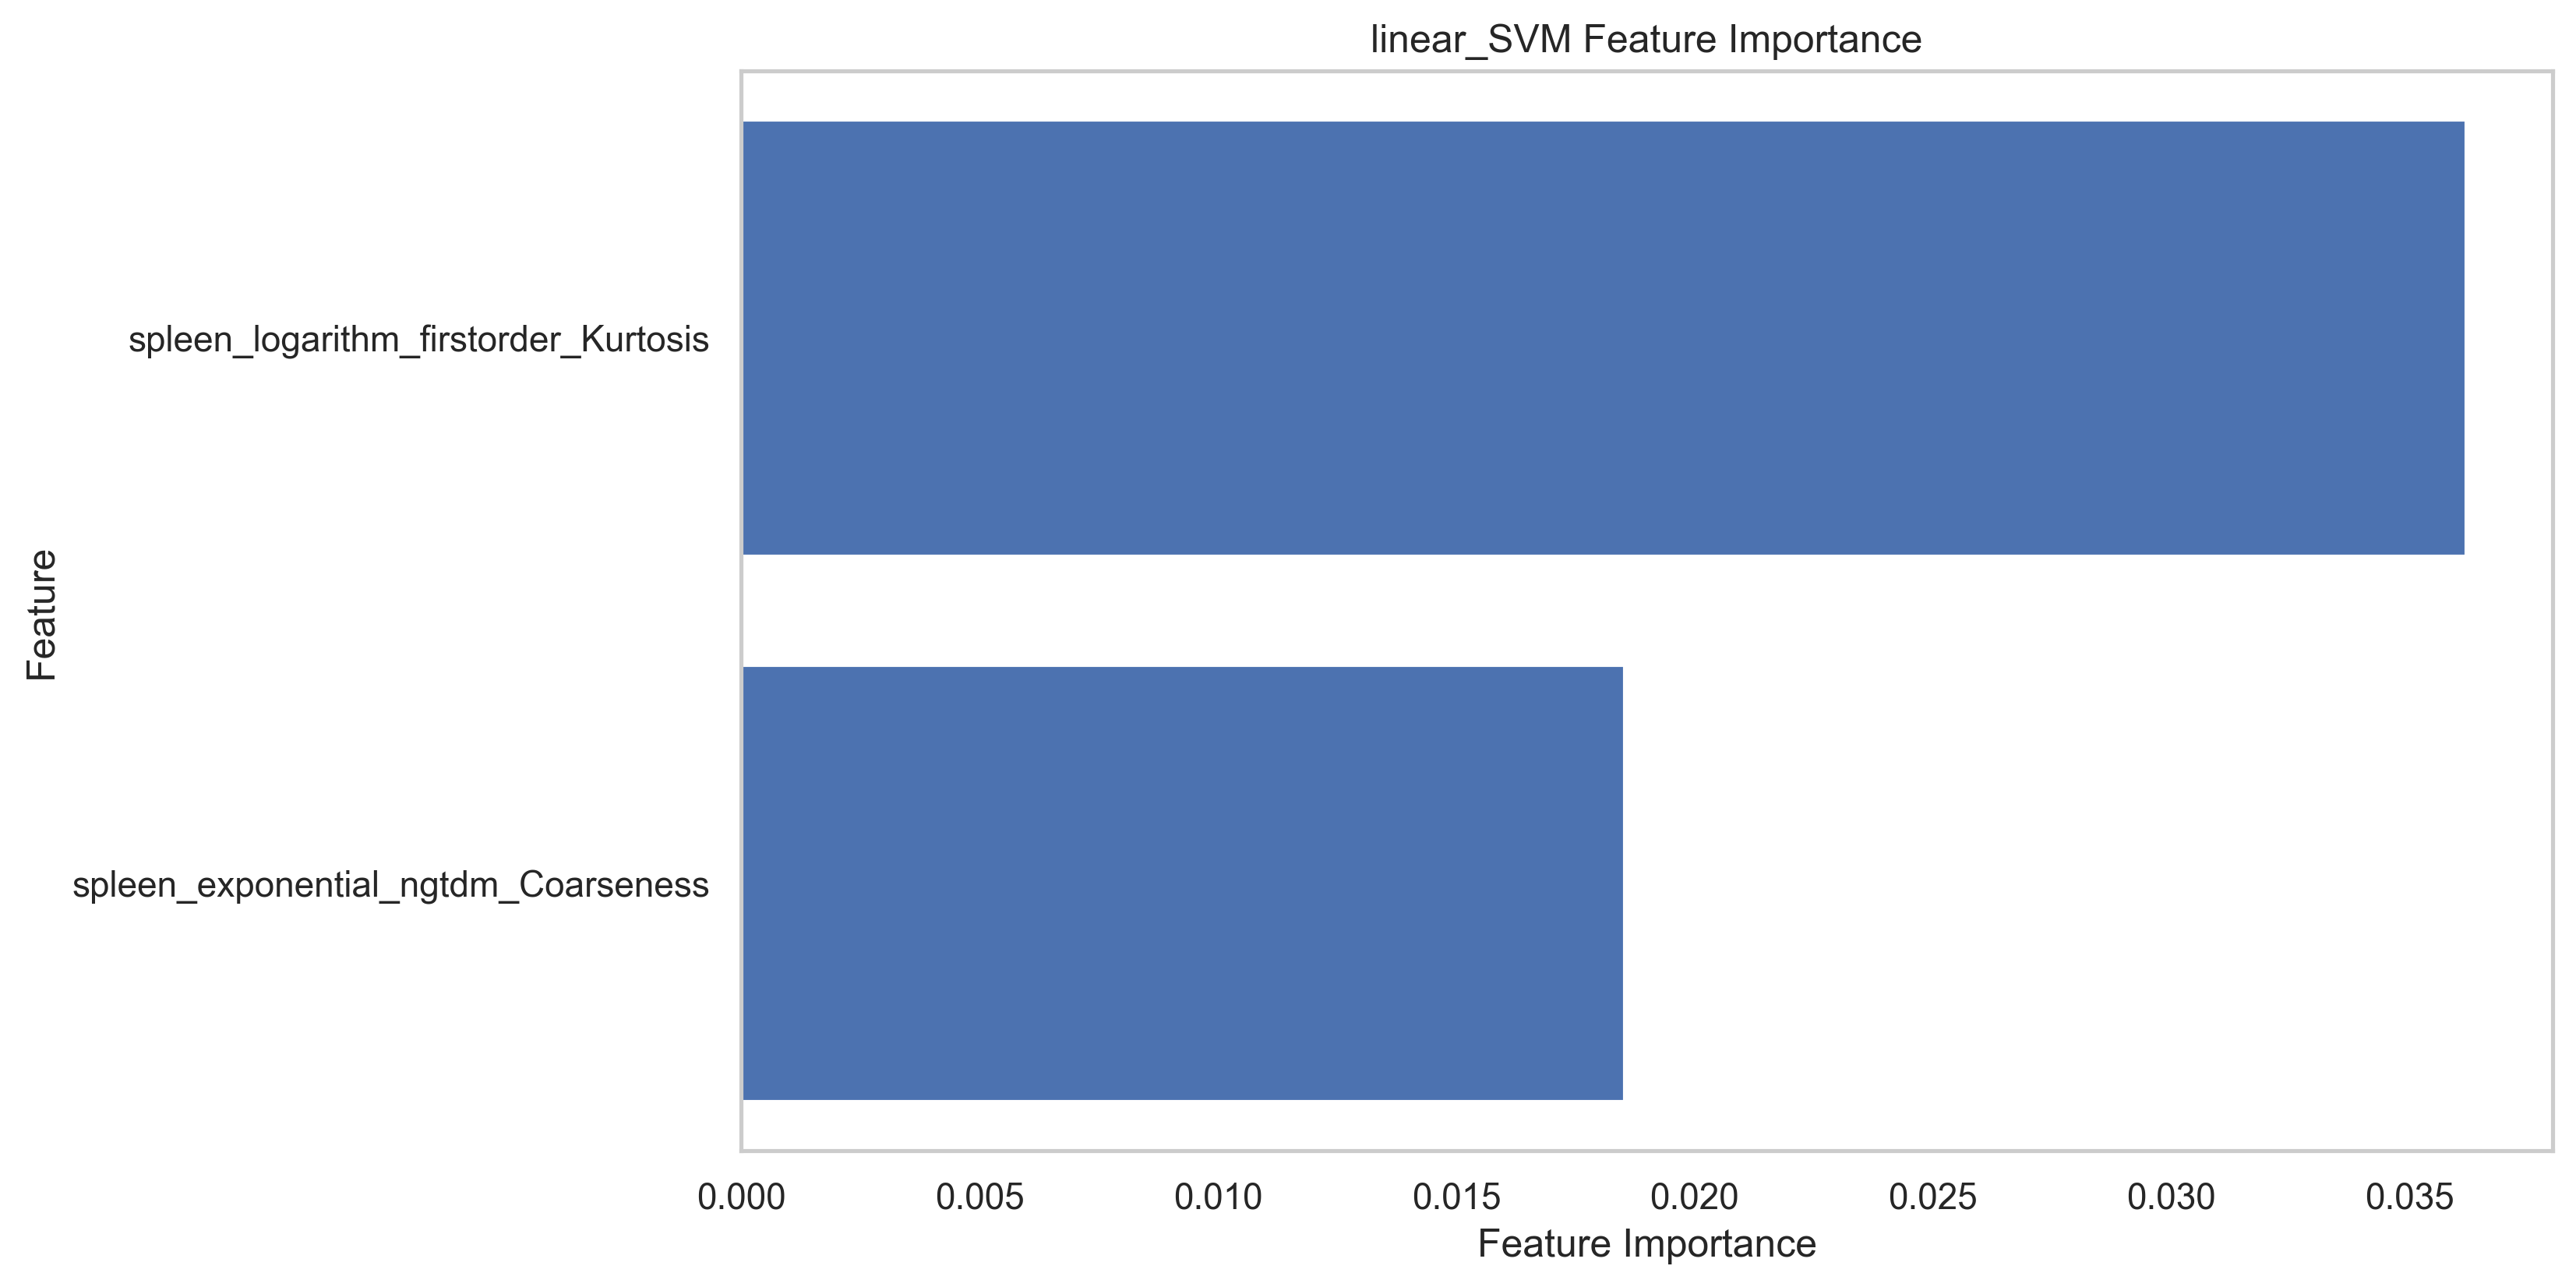

Plotting feature importance for poly_SVM...


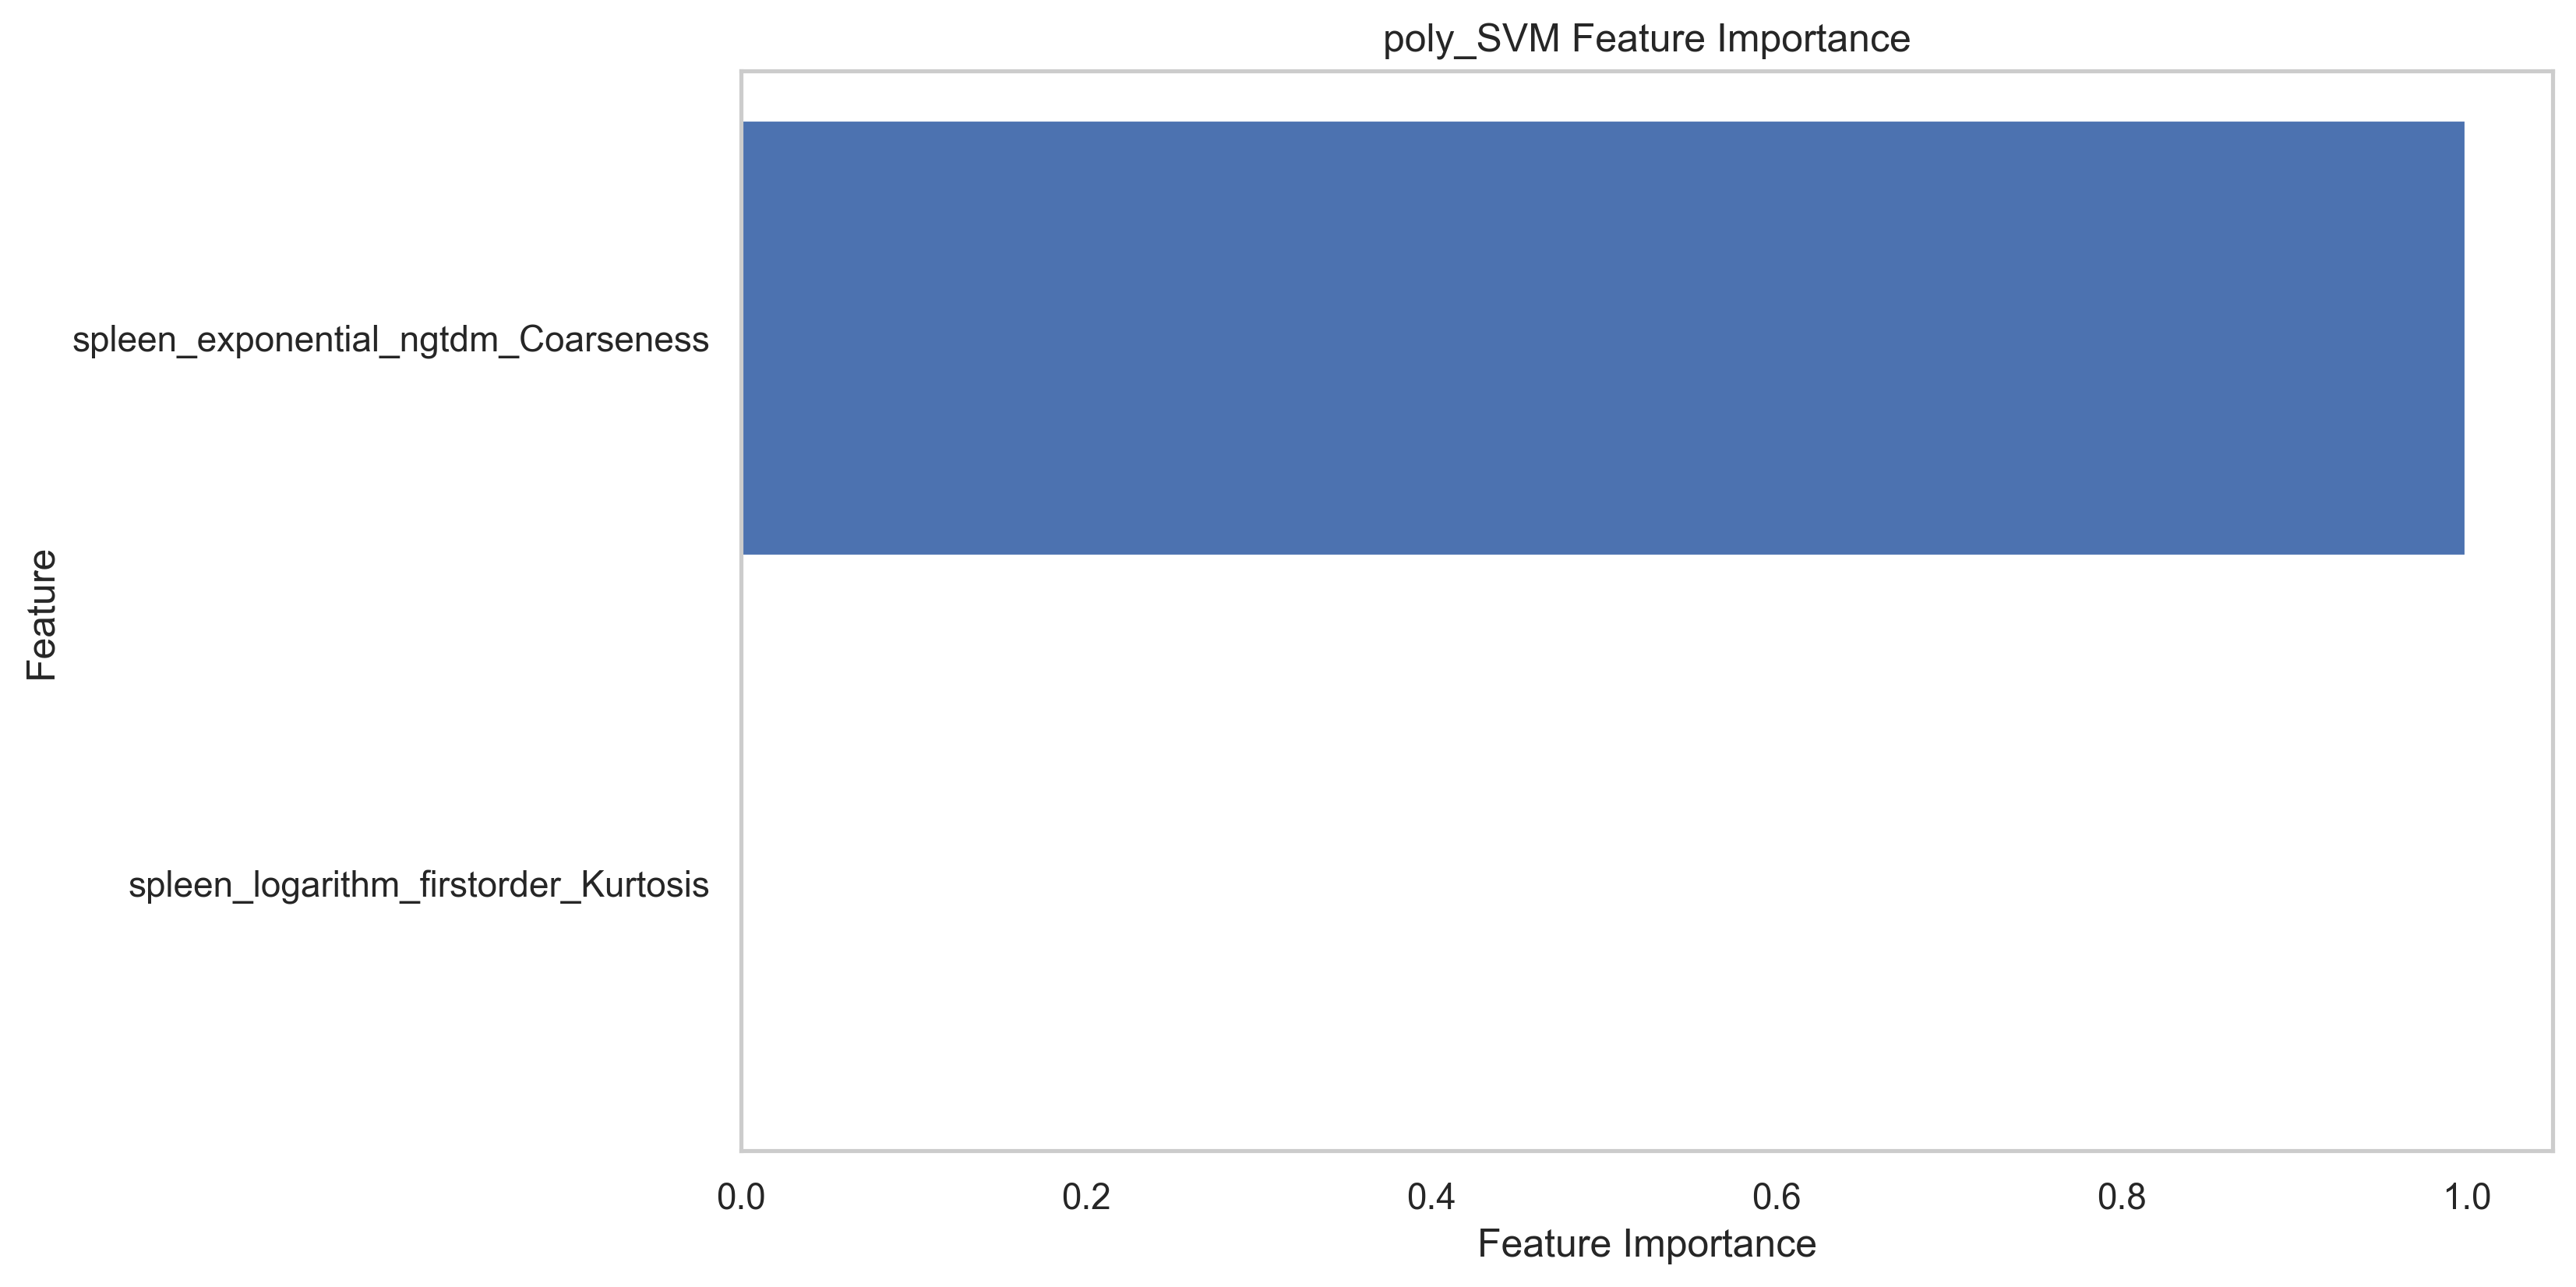

Plotting feature importance for sigmoid_SVM...


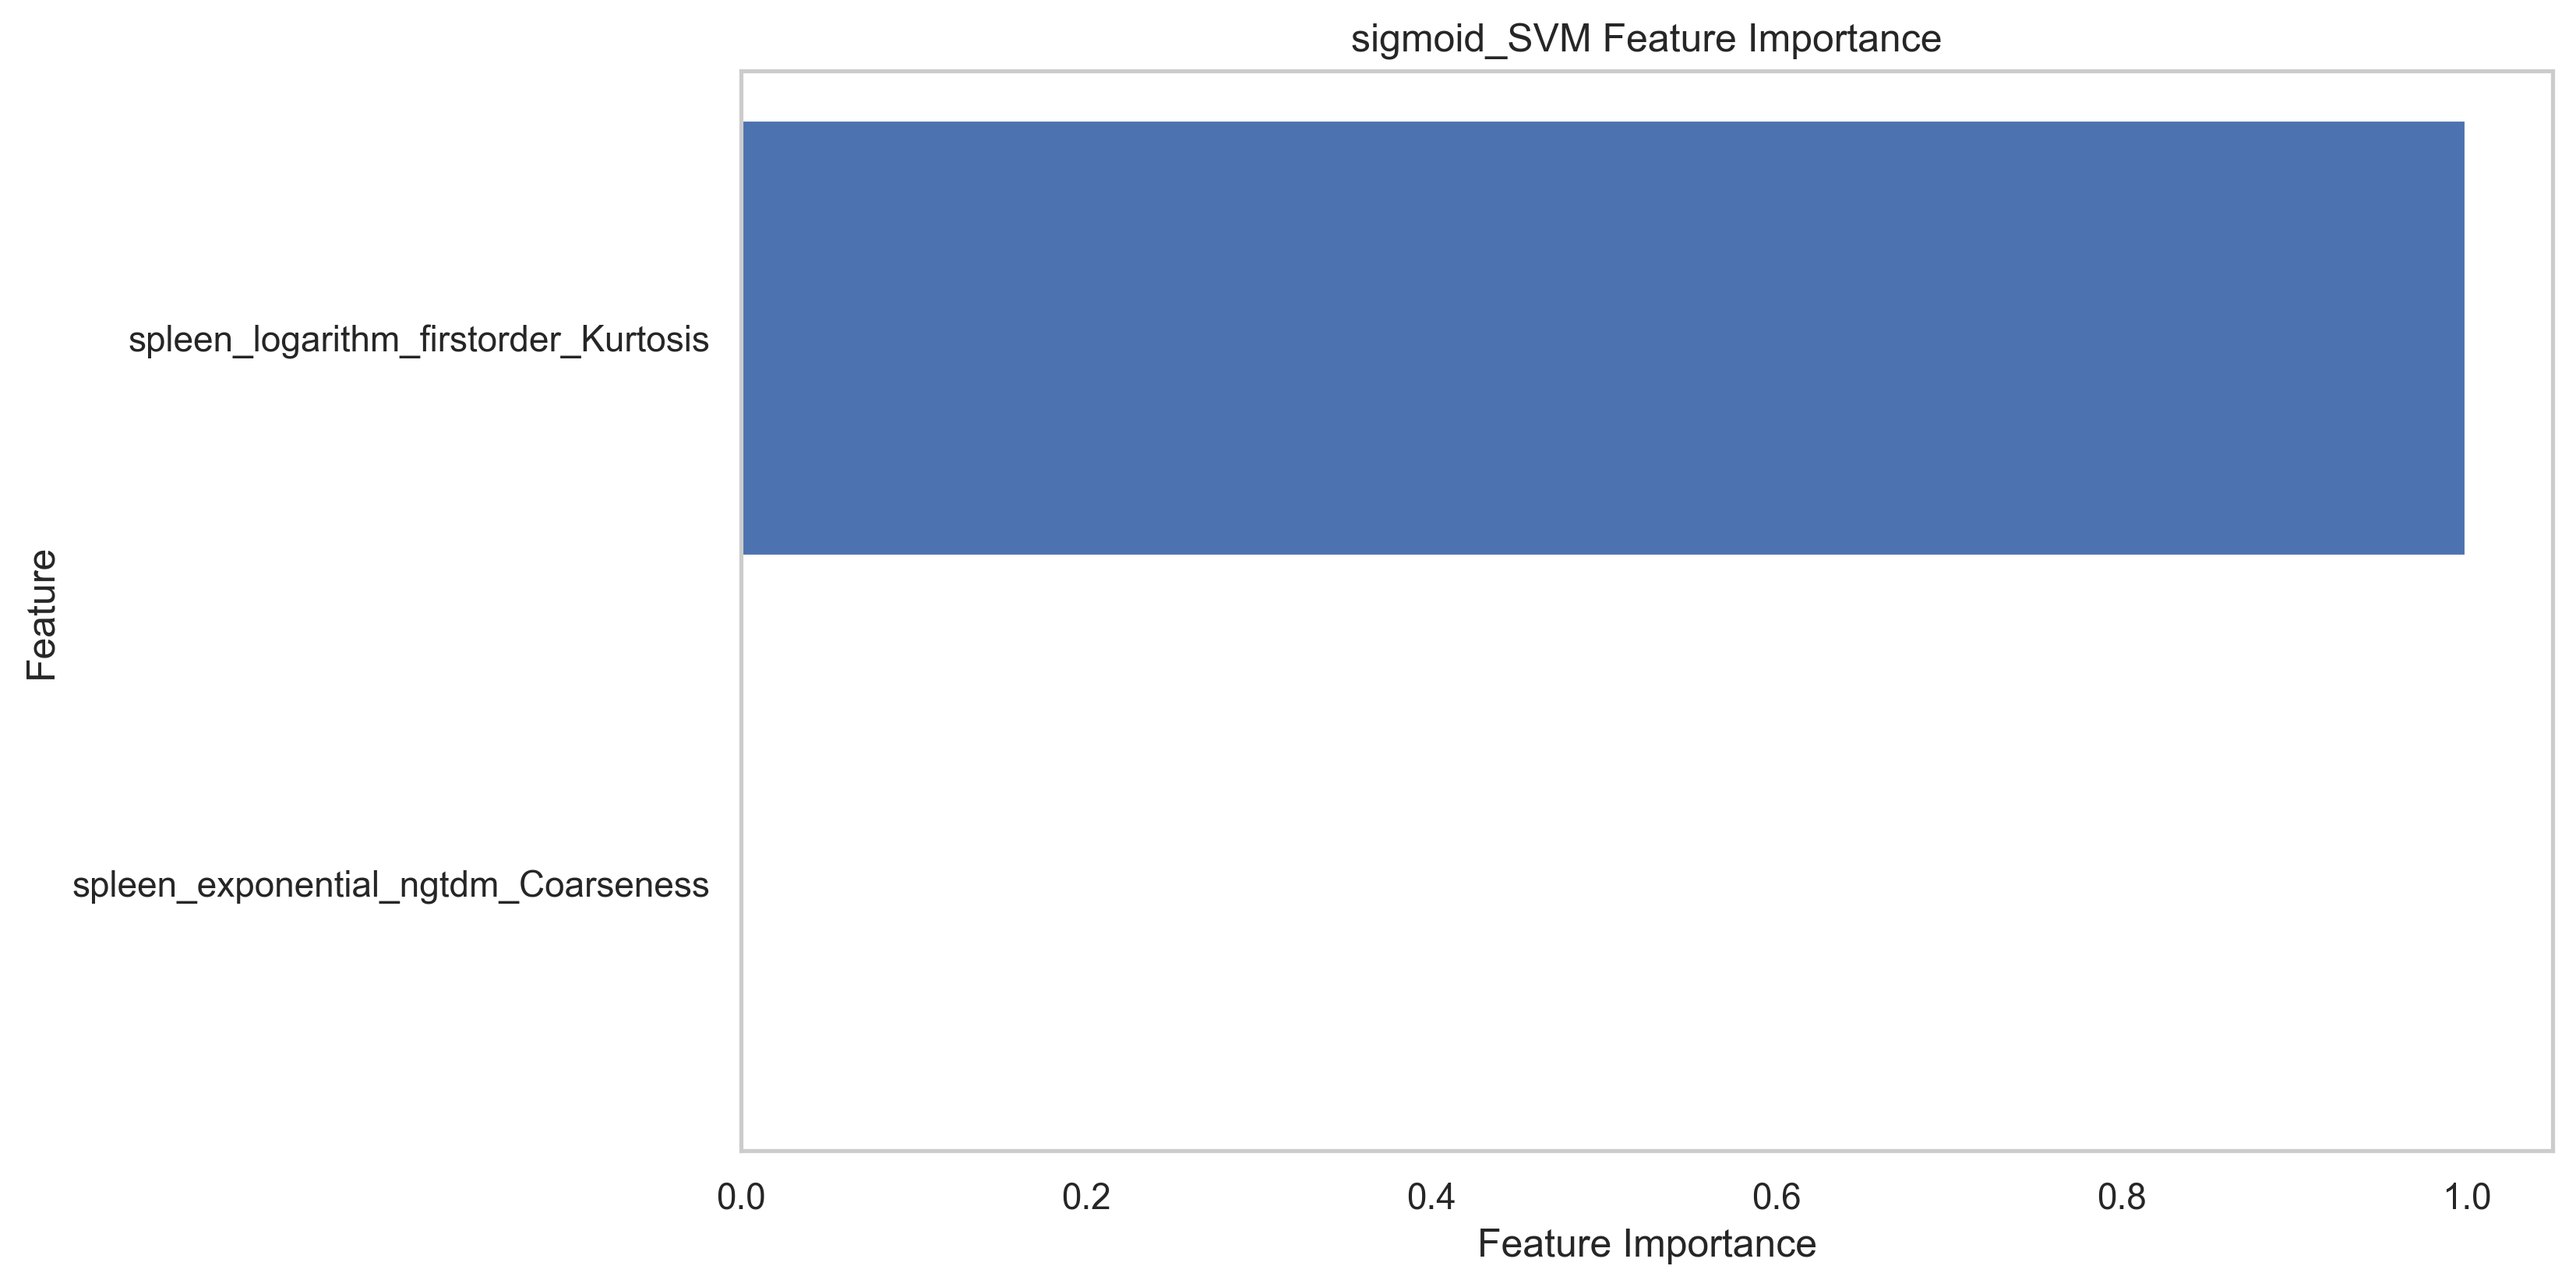

Plotting feature importance for rbf_SVM...


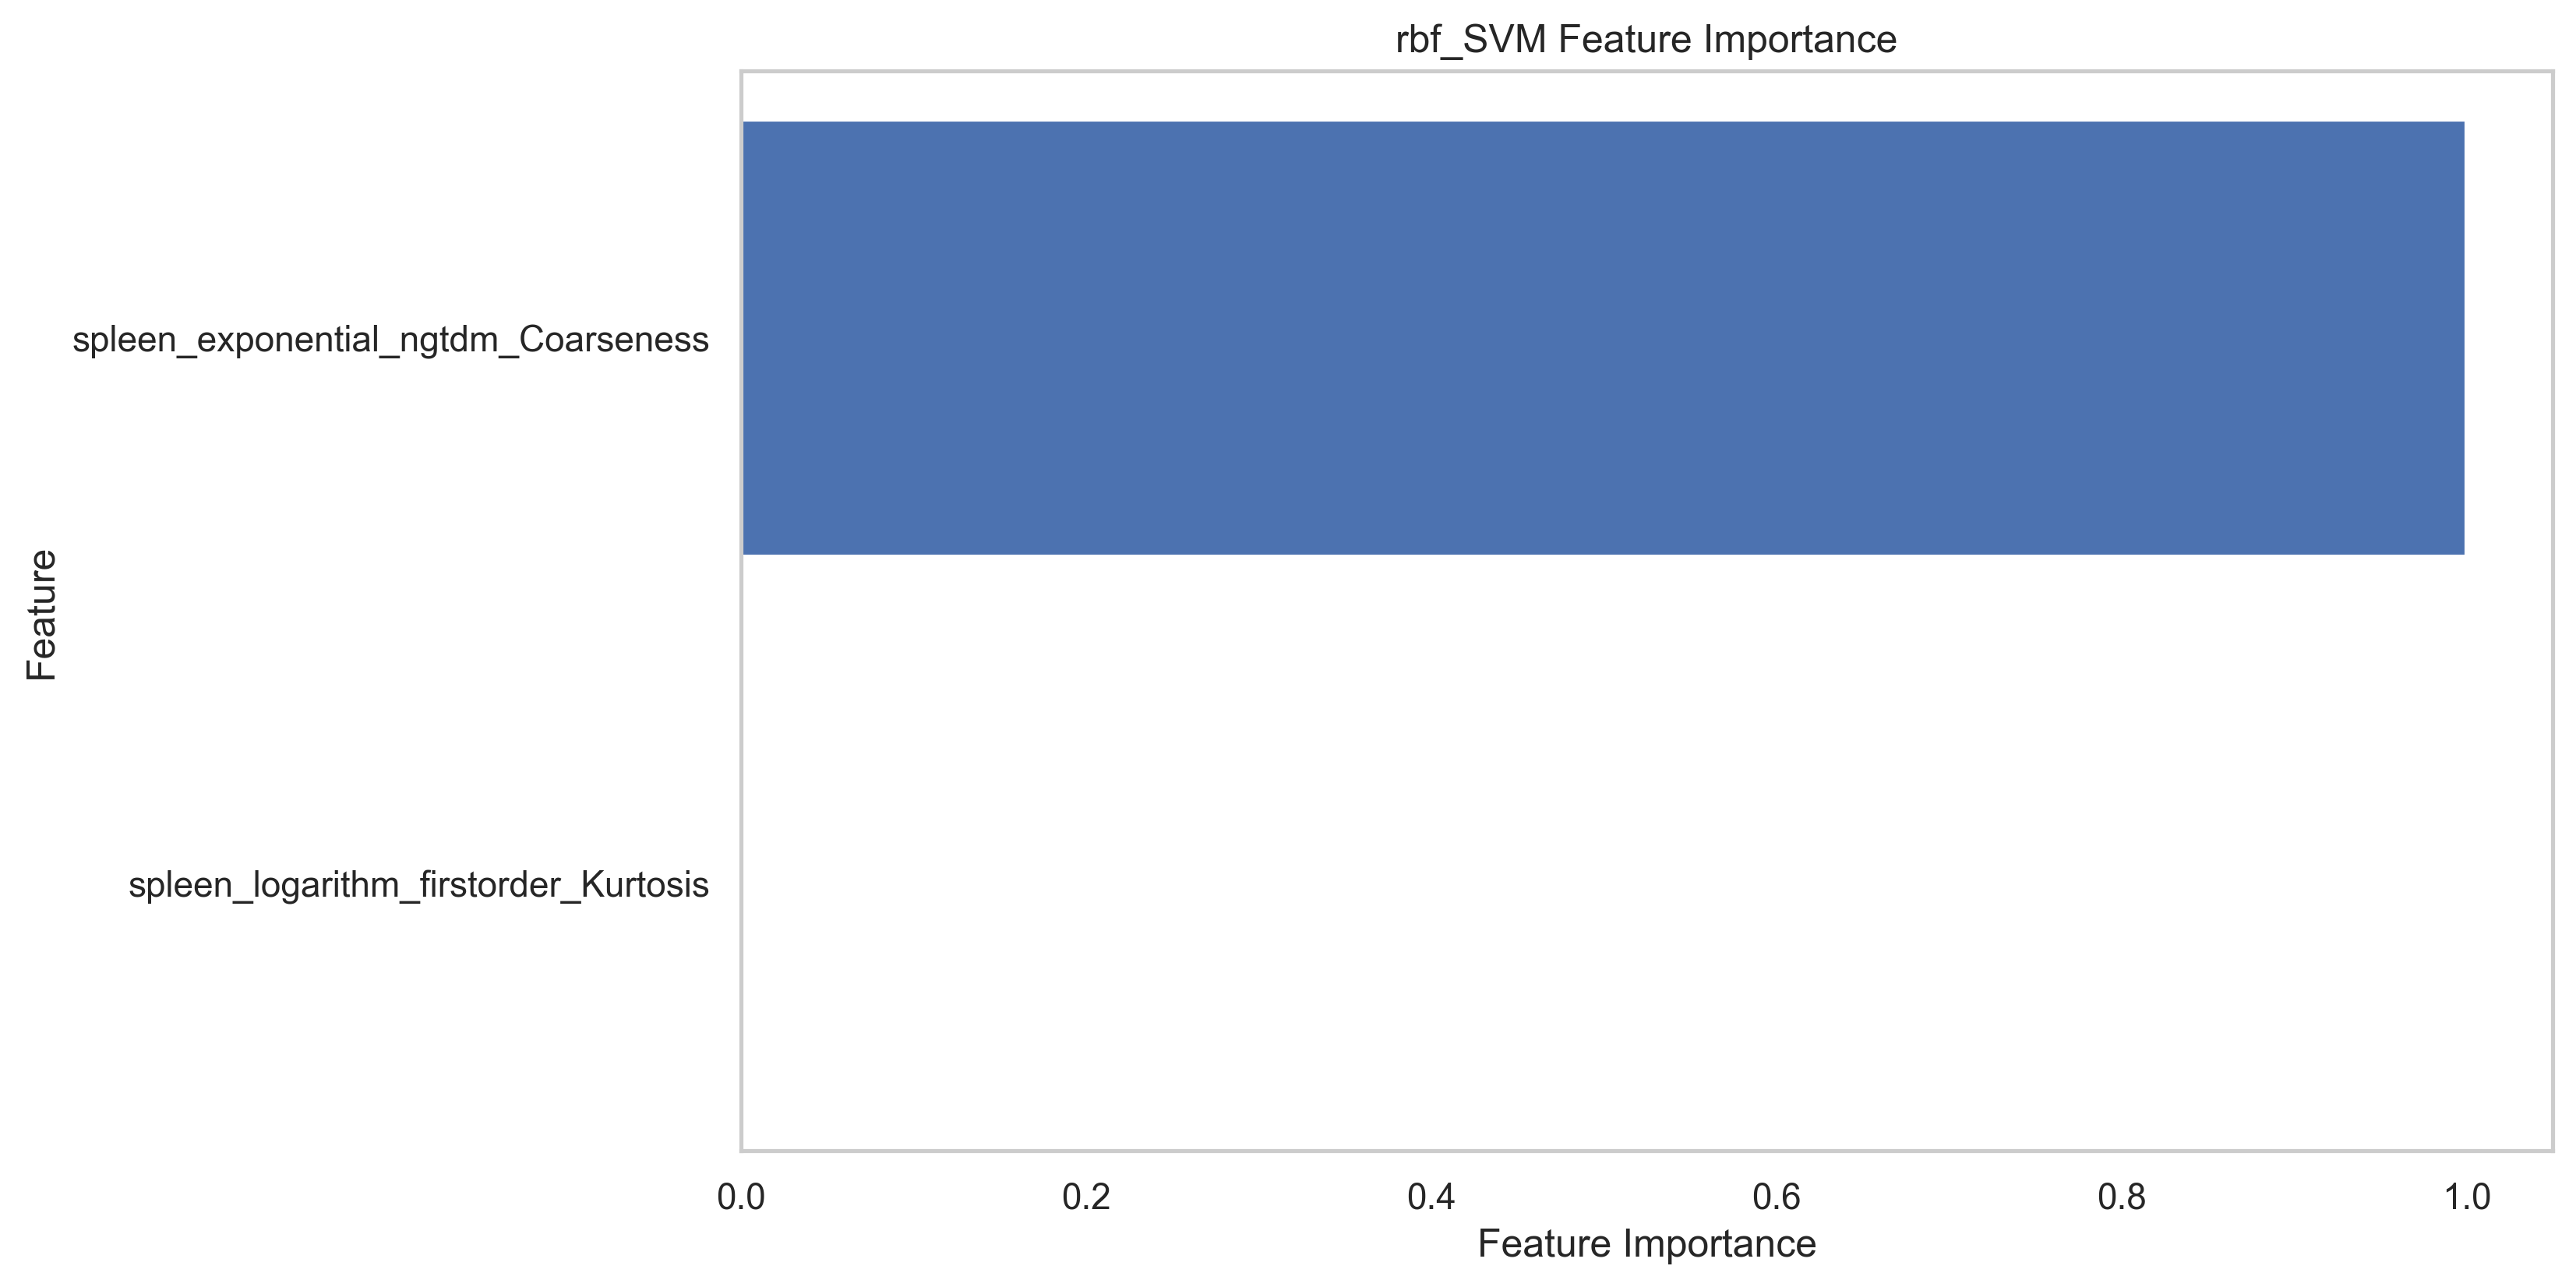

Plotting feature importance for DT...


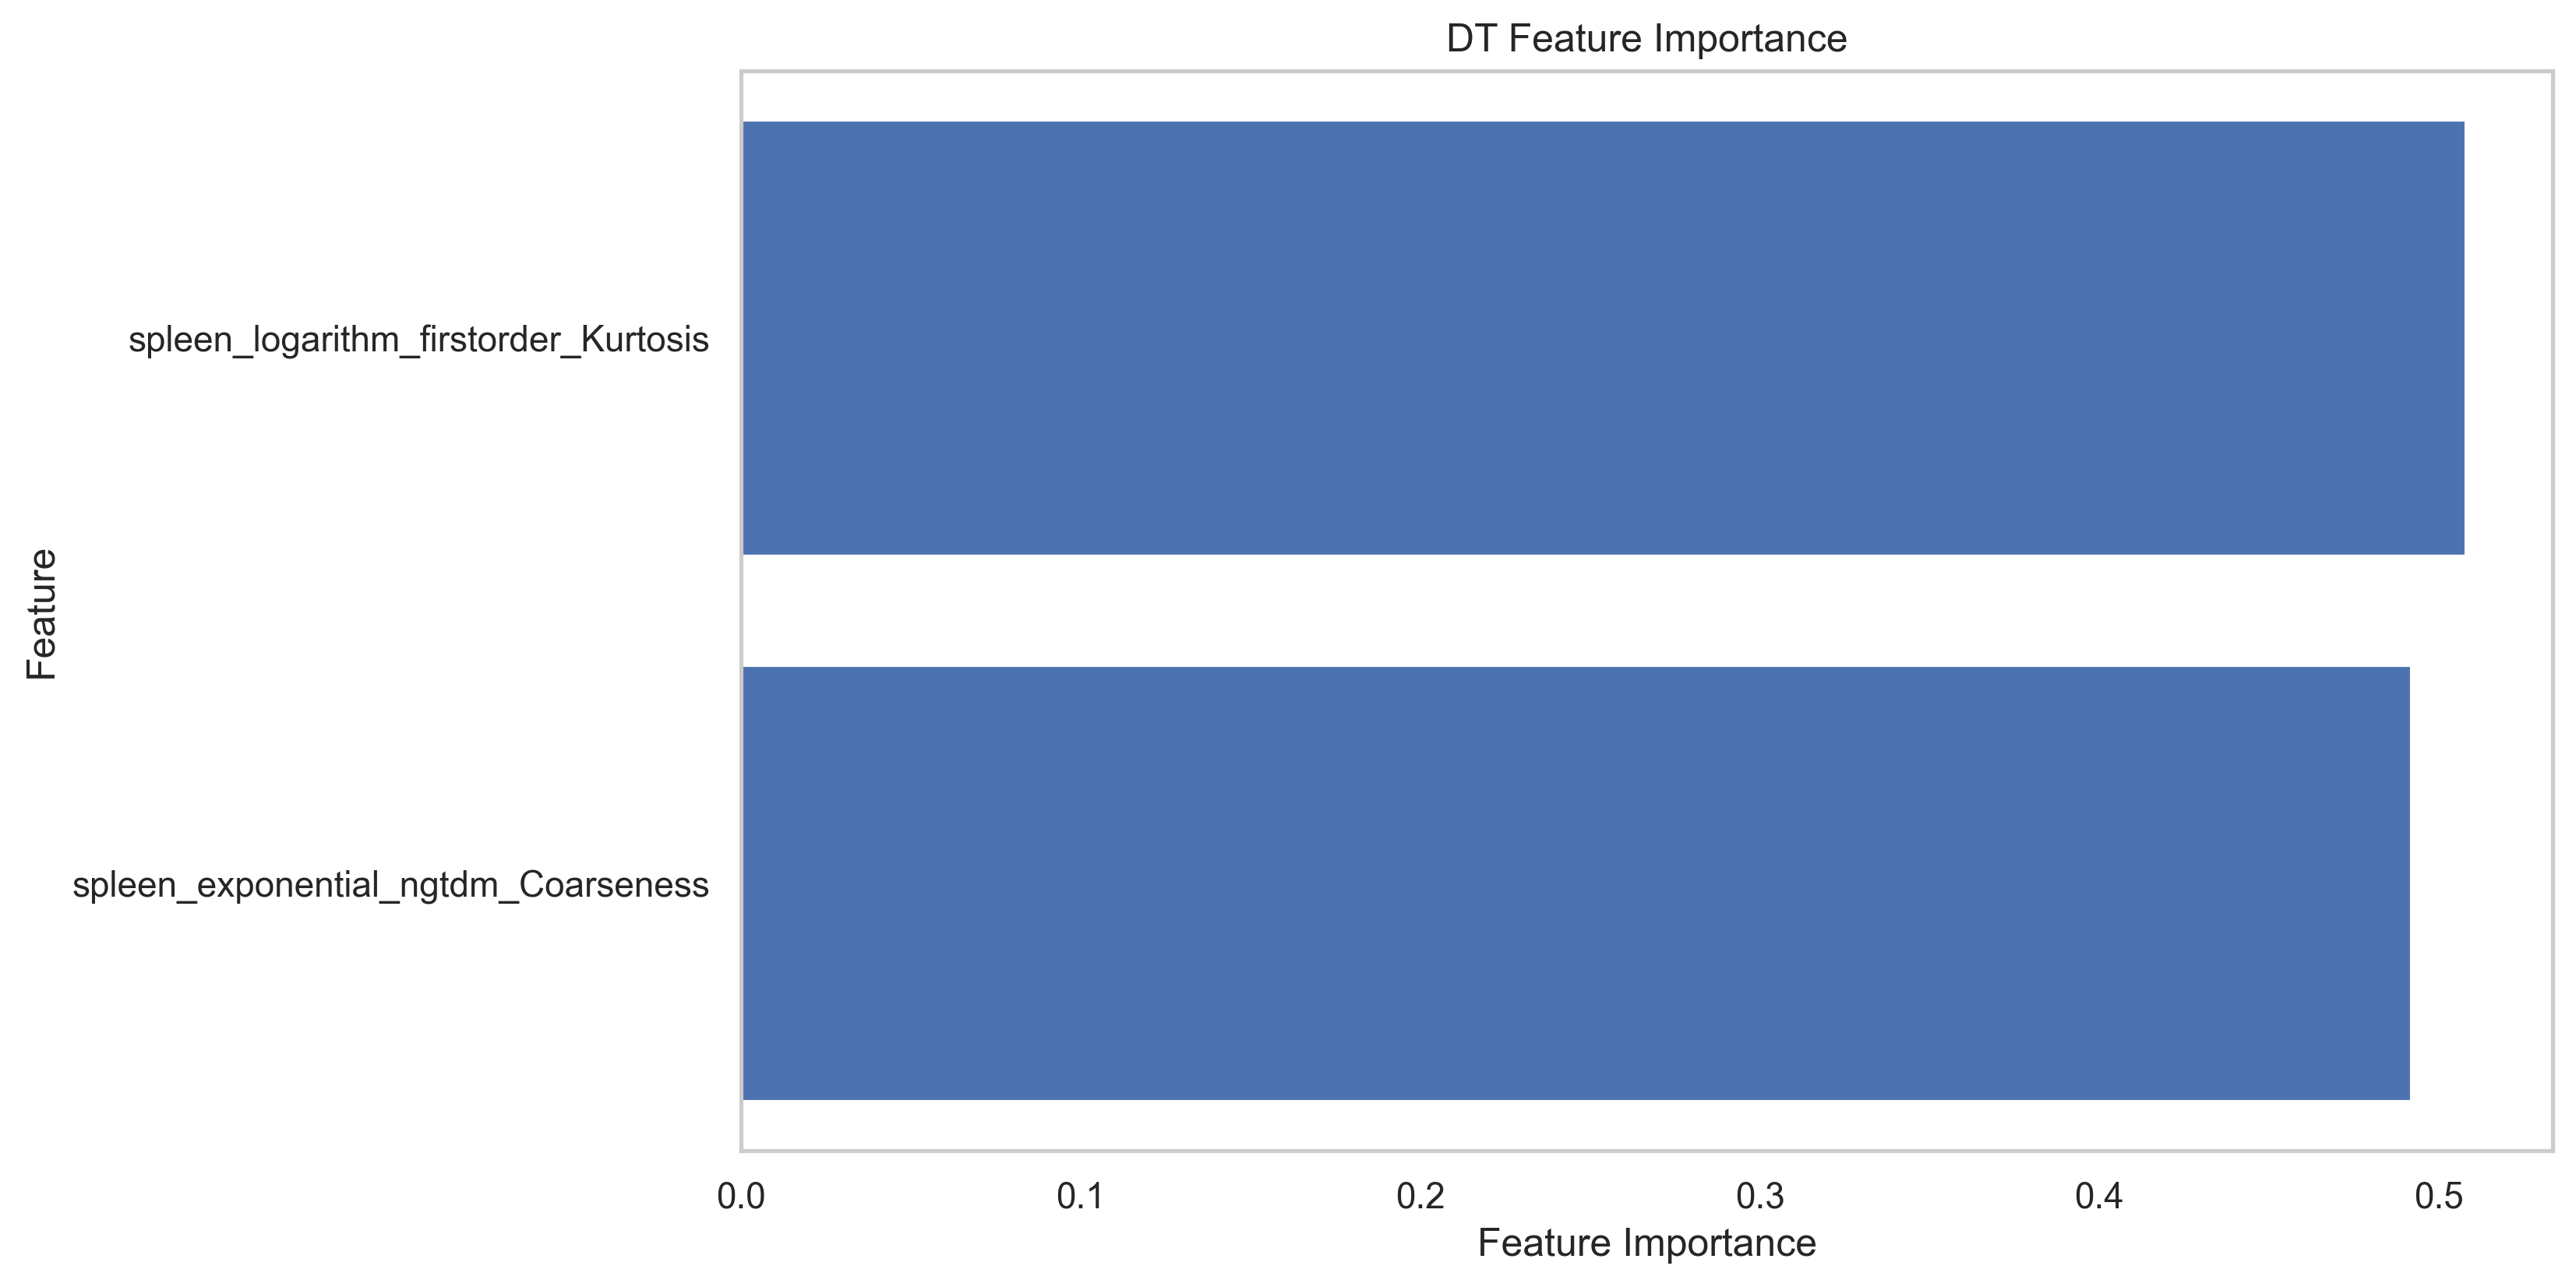

Plotting feature importance for RF...


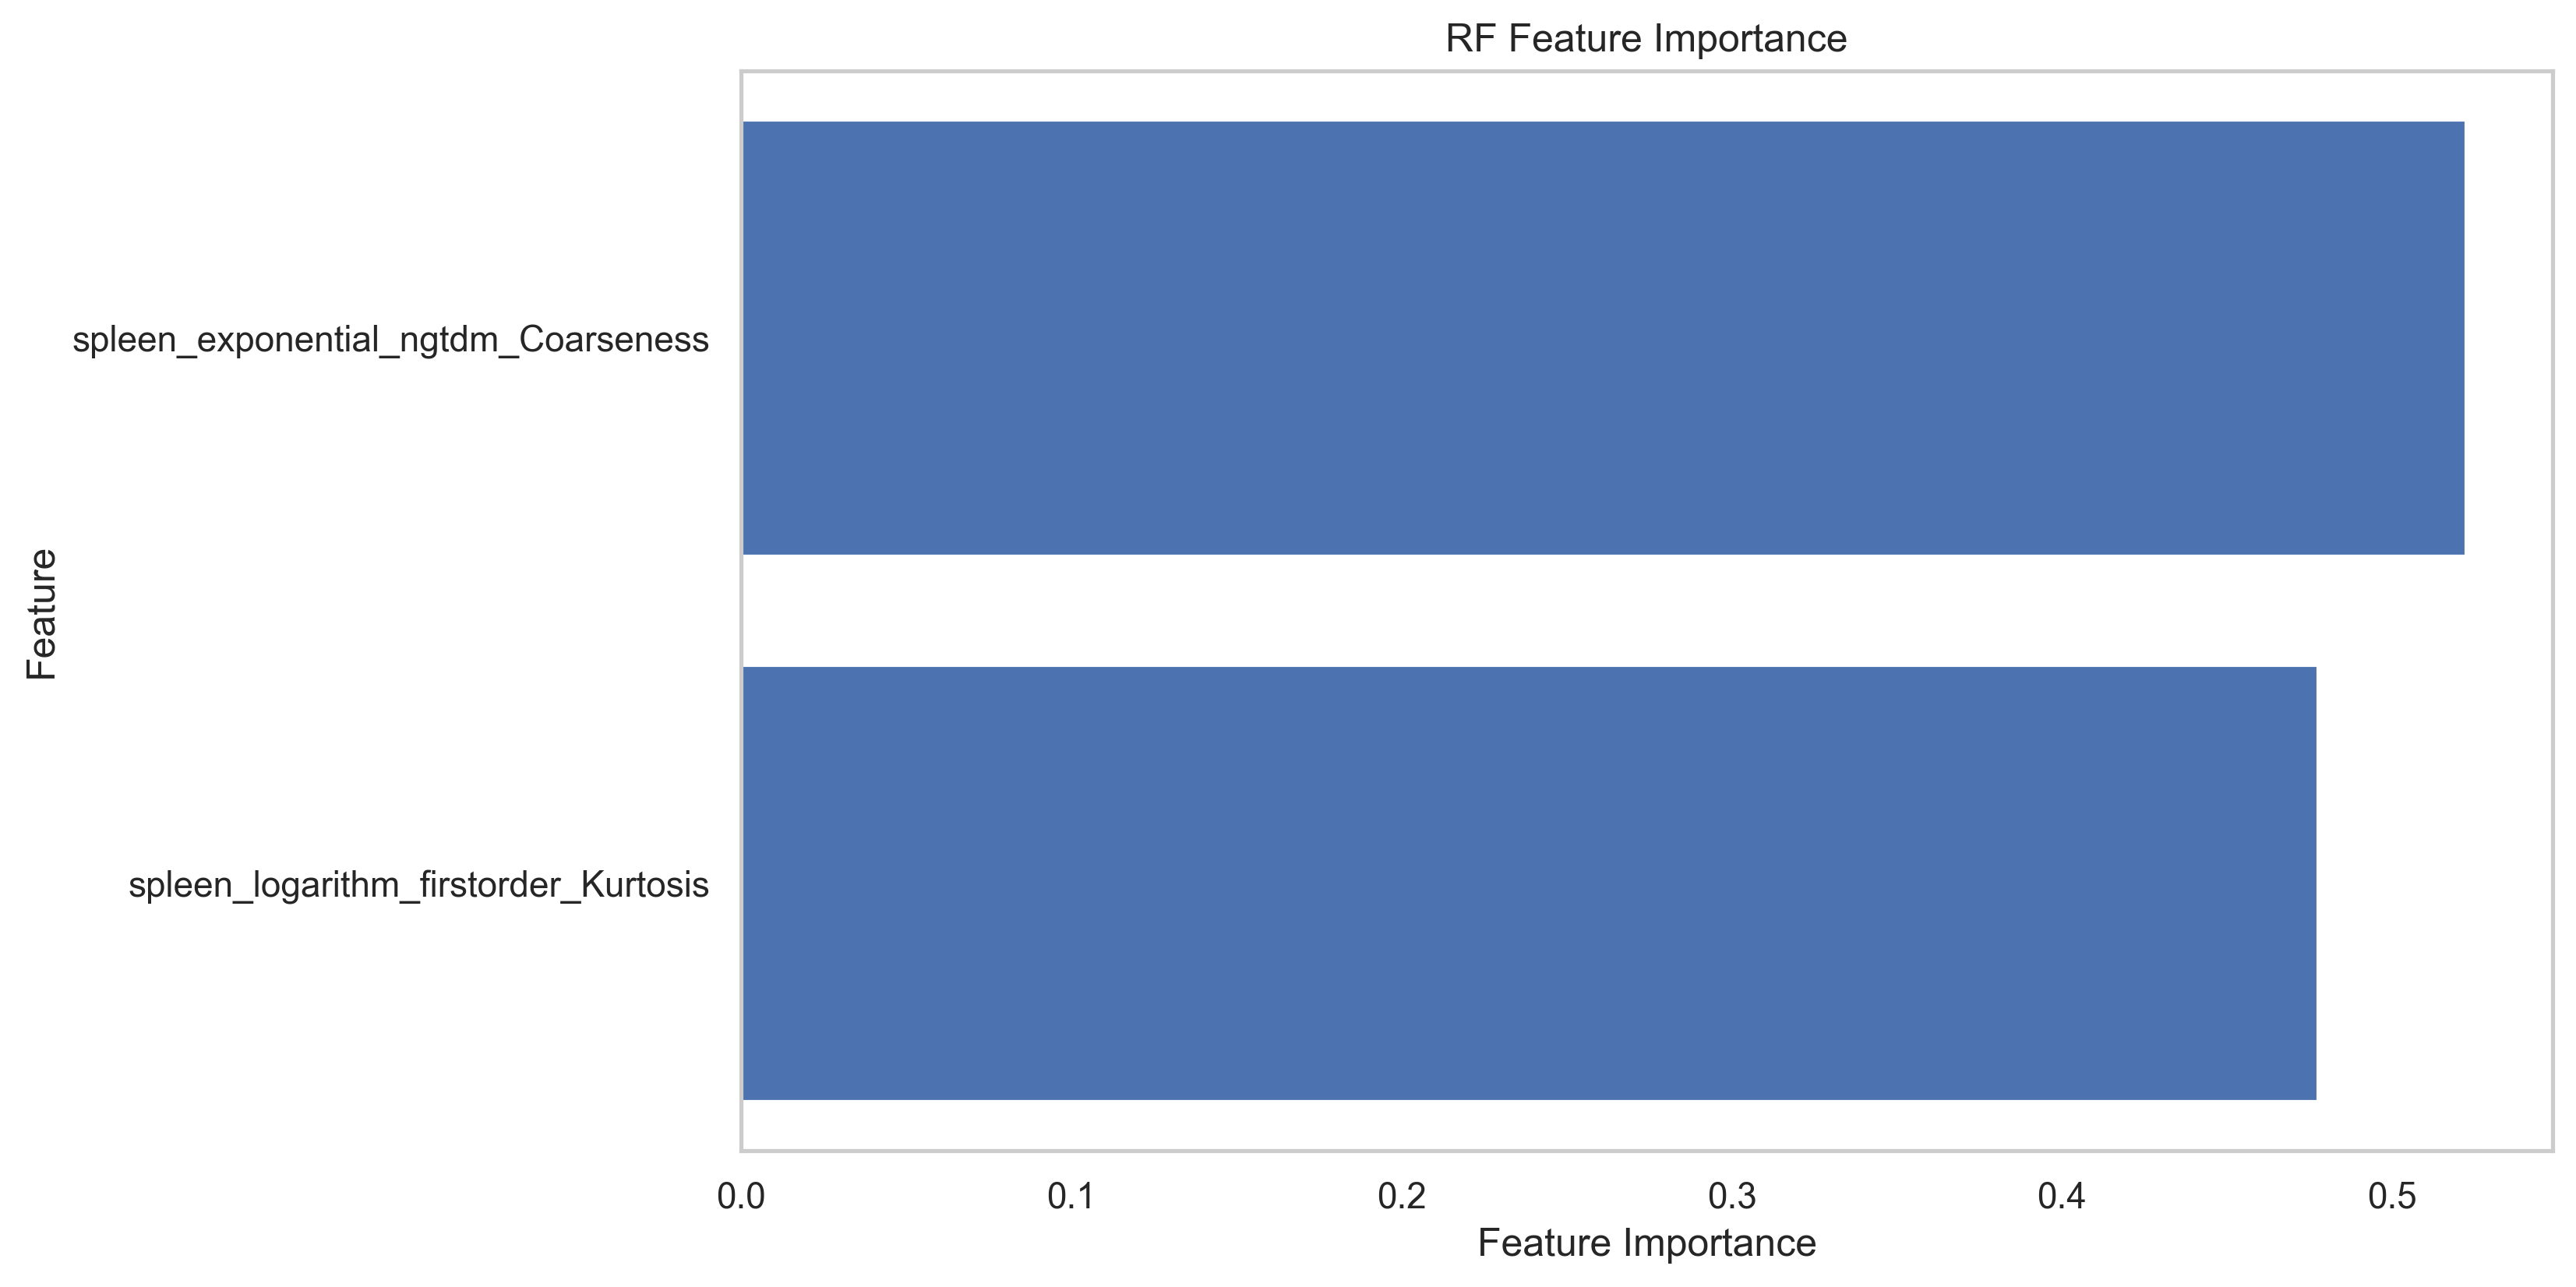

Plotting feature importance for ExtraTree...


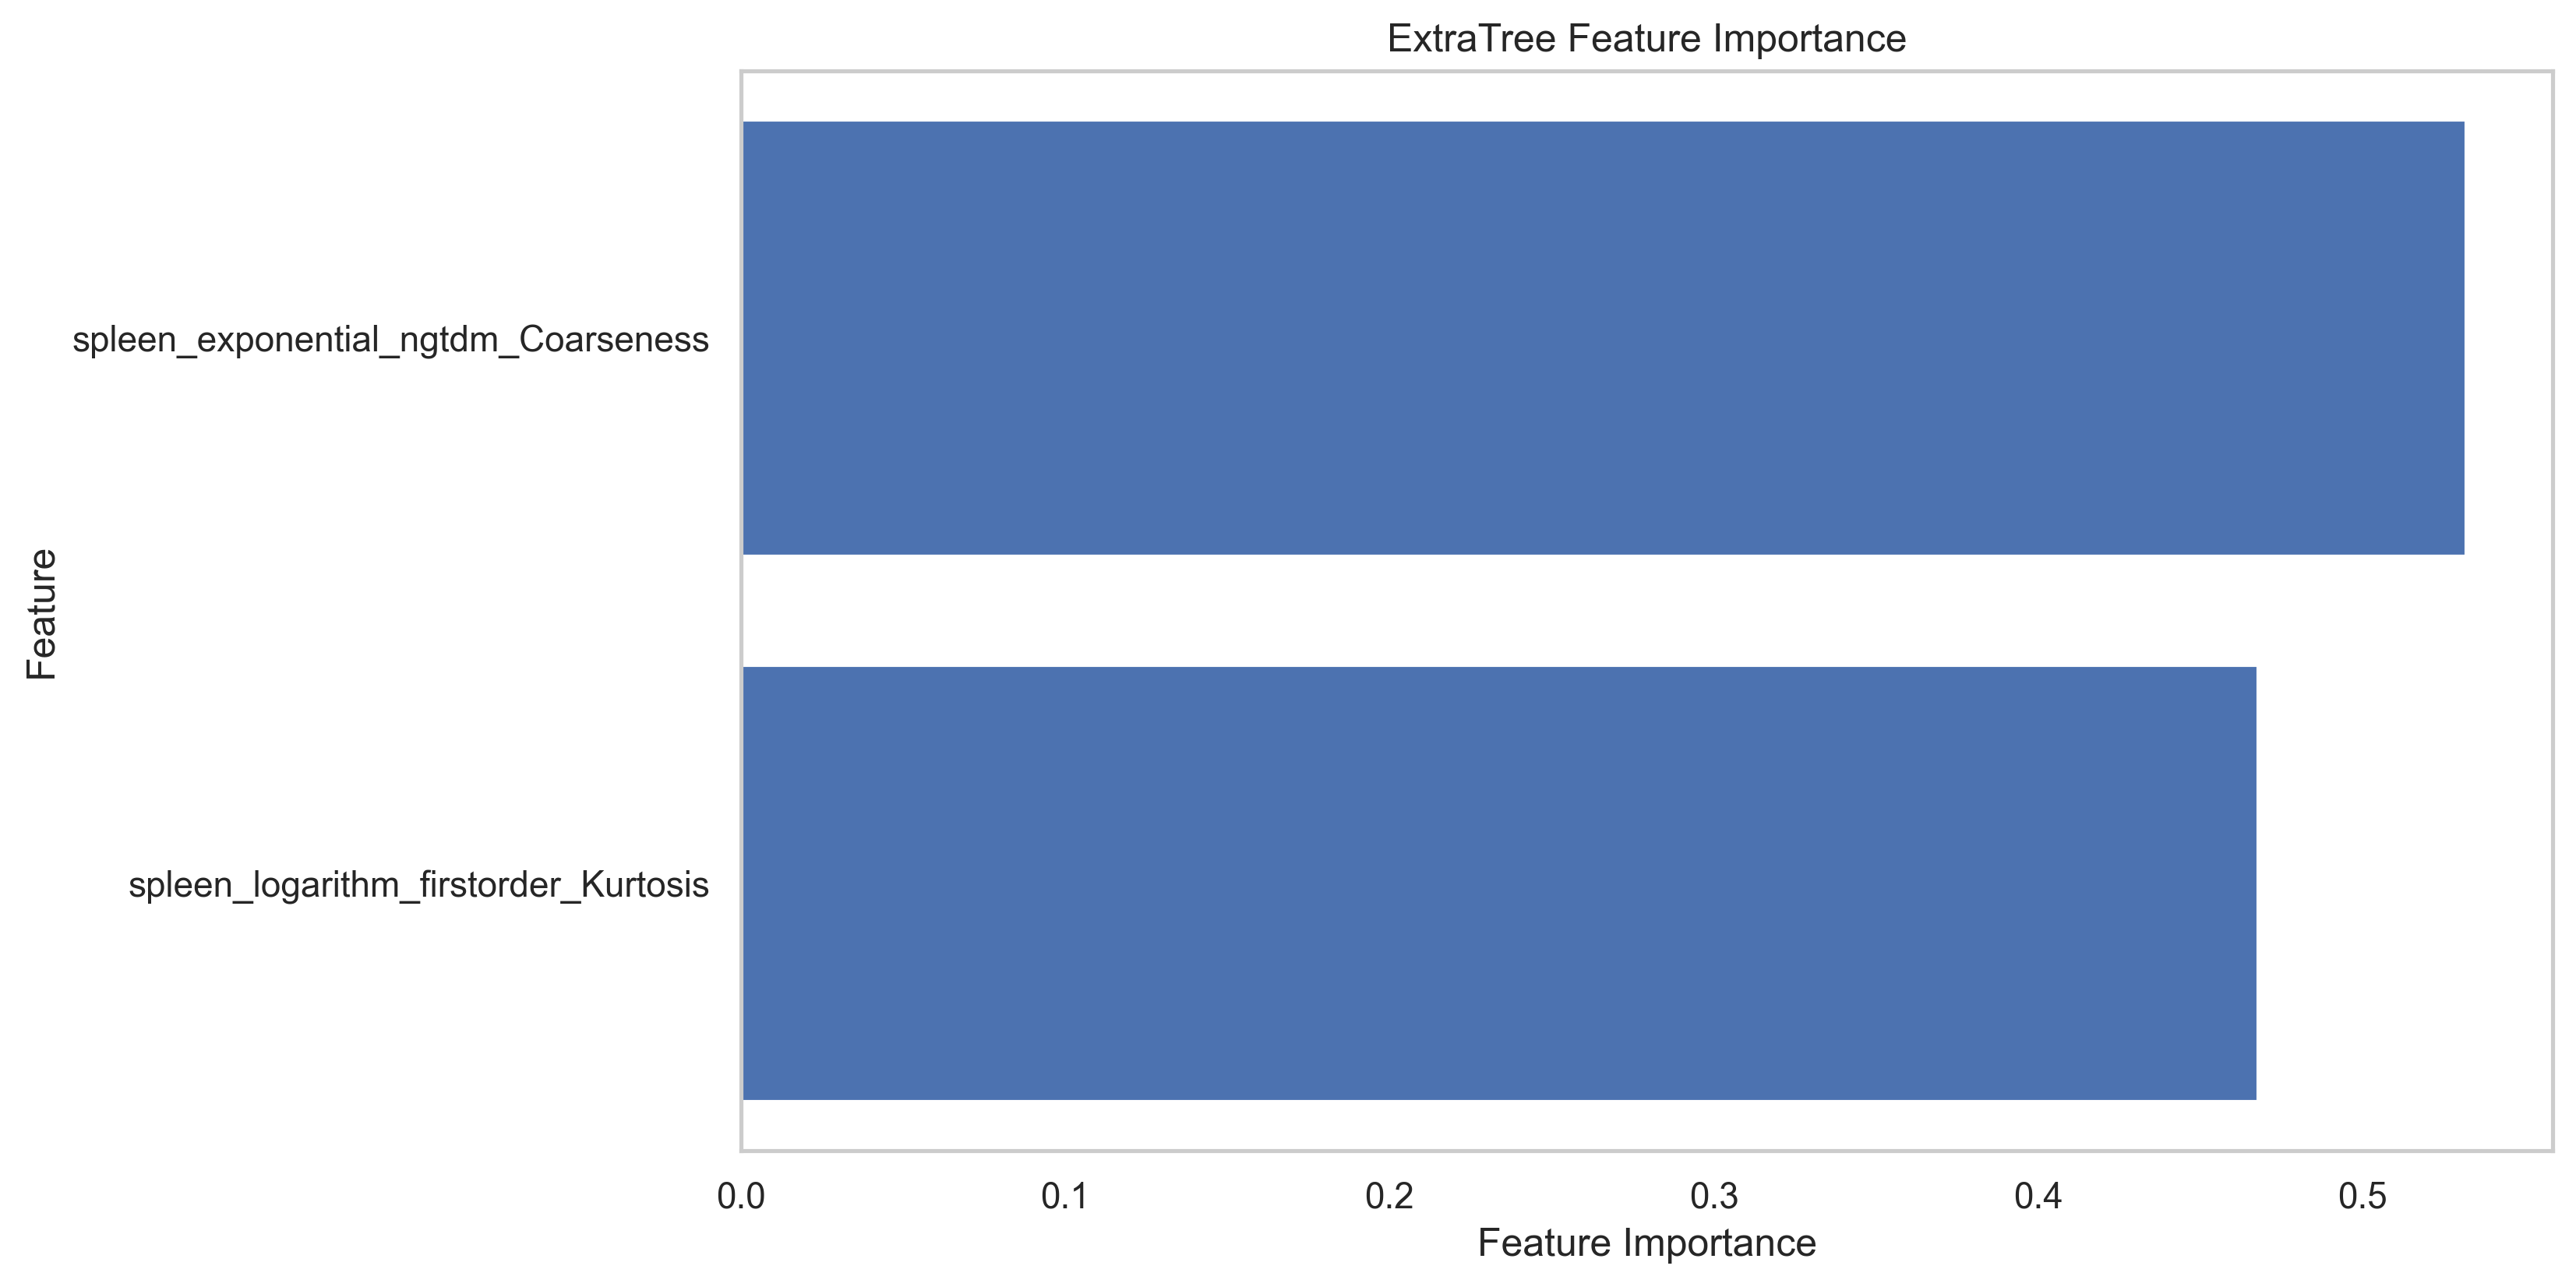

Plotting feature importance for XGBoost...


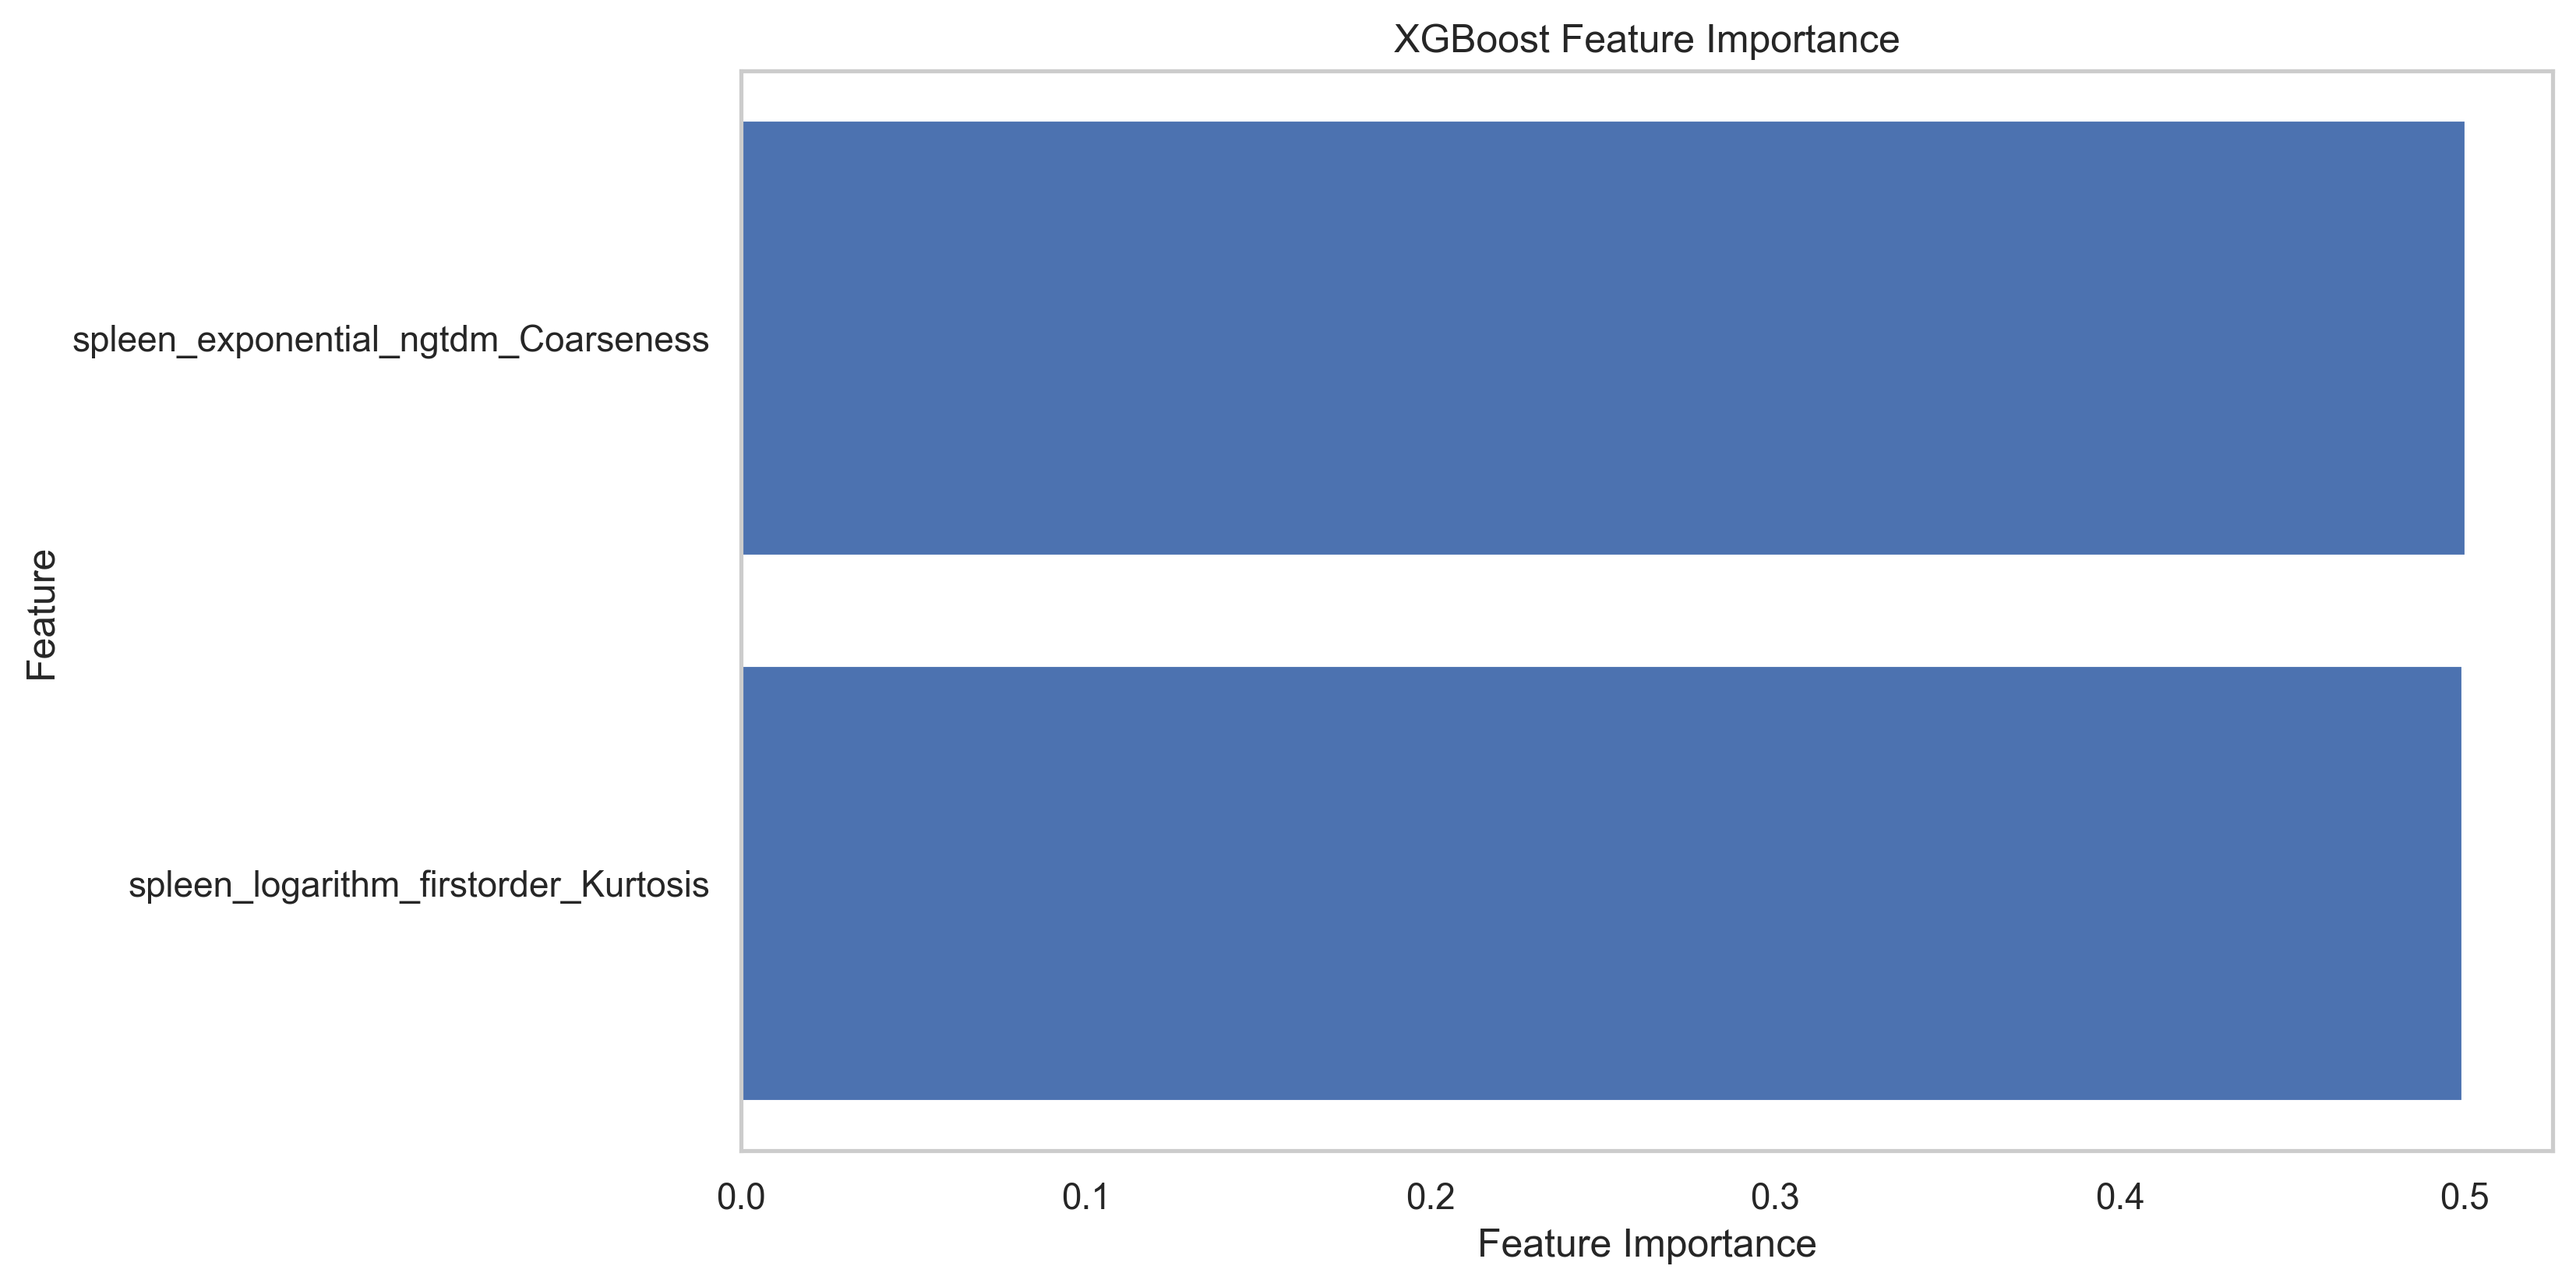

Plotting feature importance for AdaBoost...


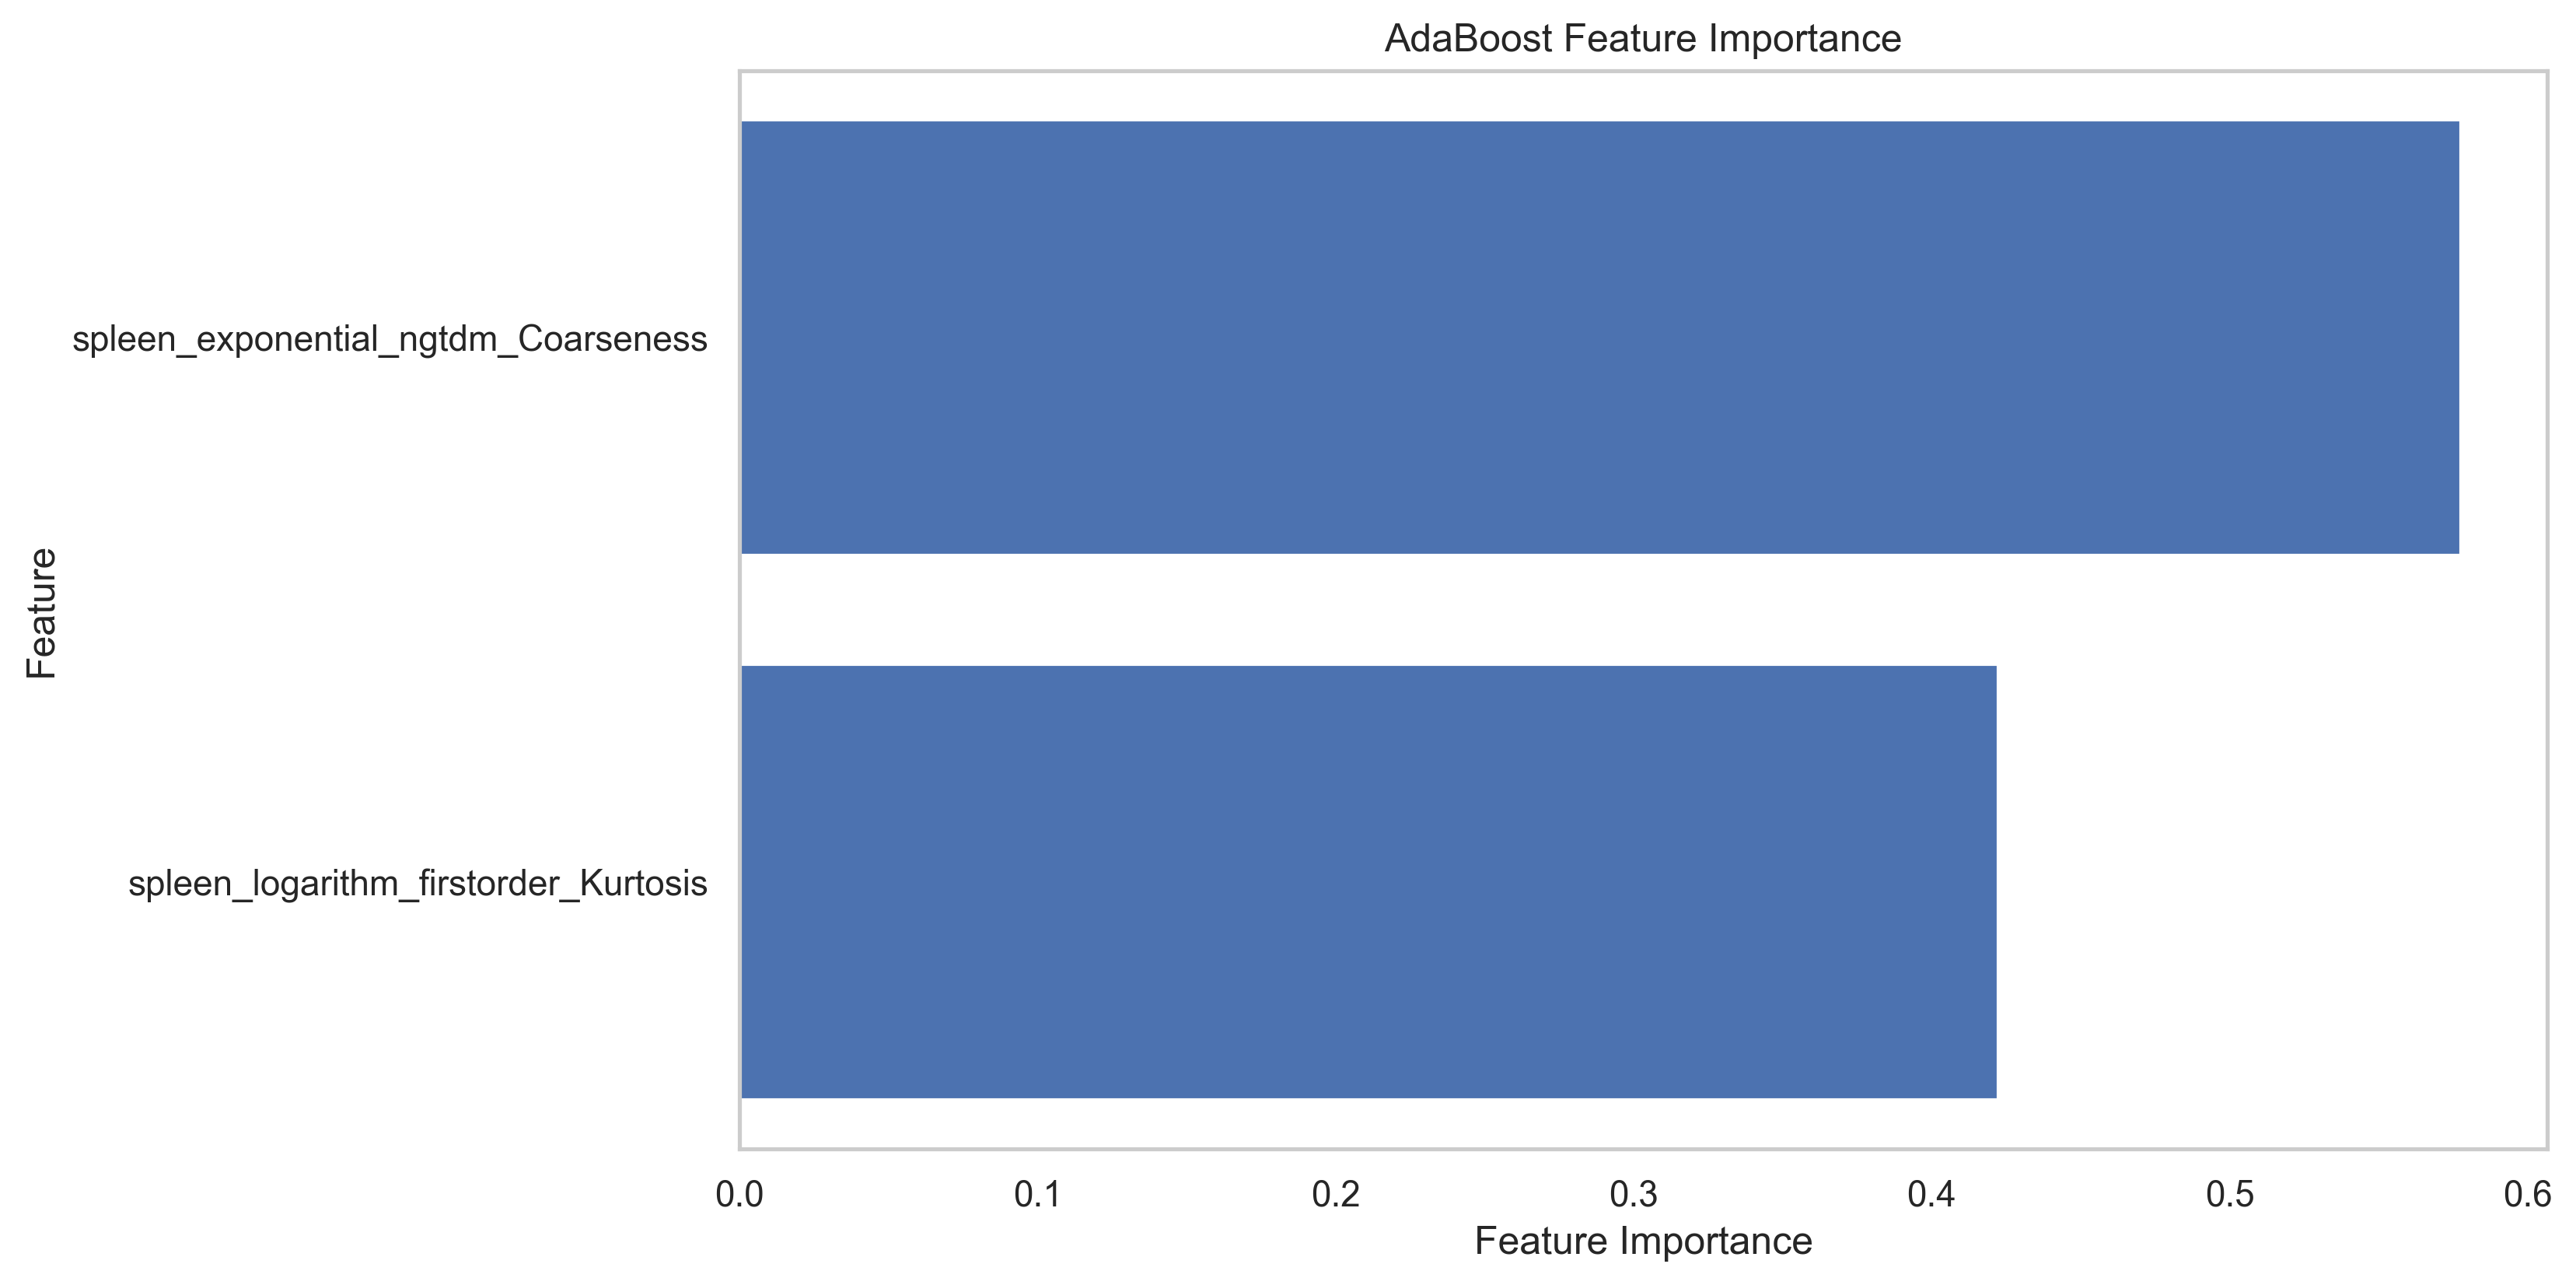

Plotting feature importance for MLP...


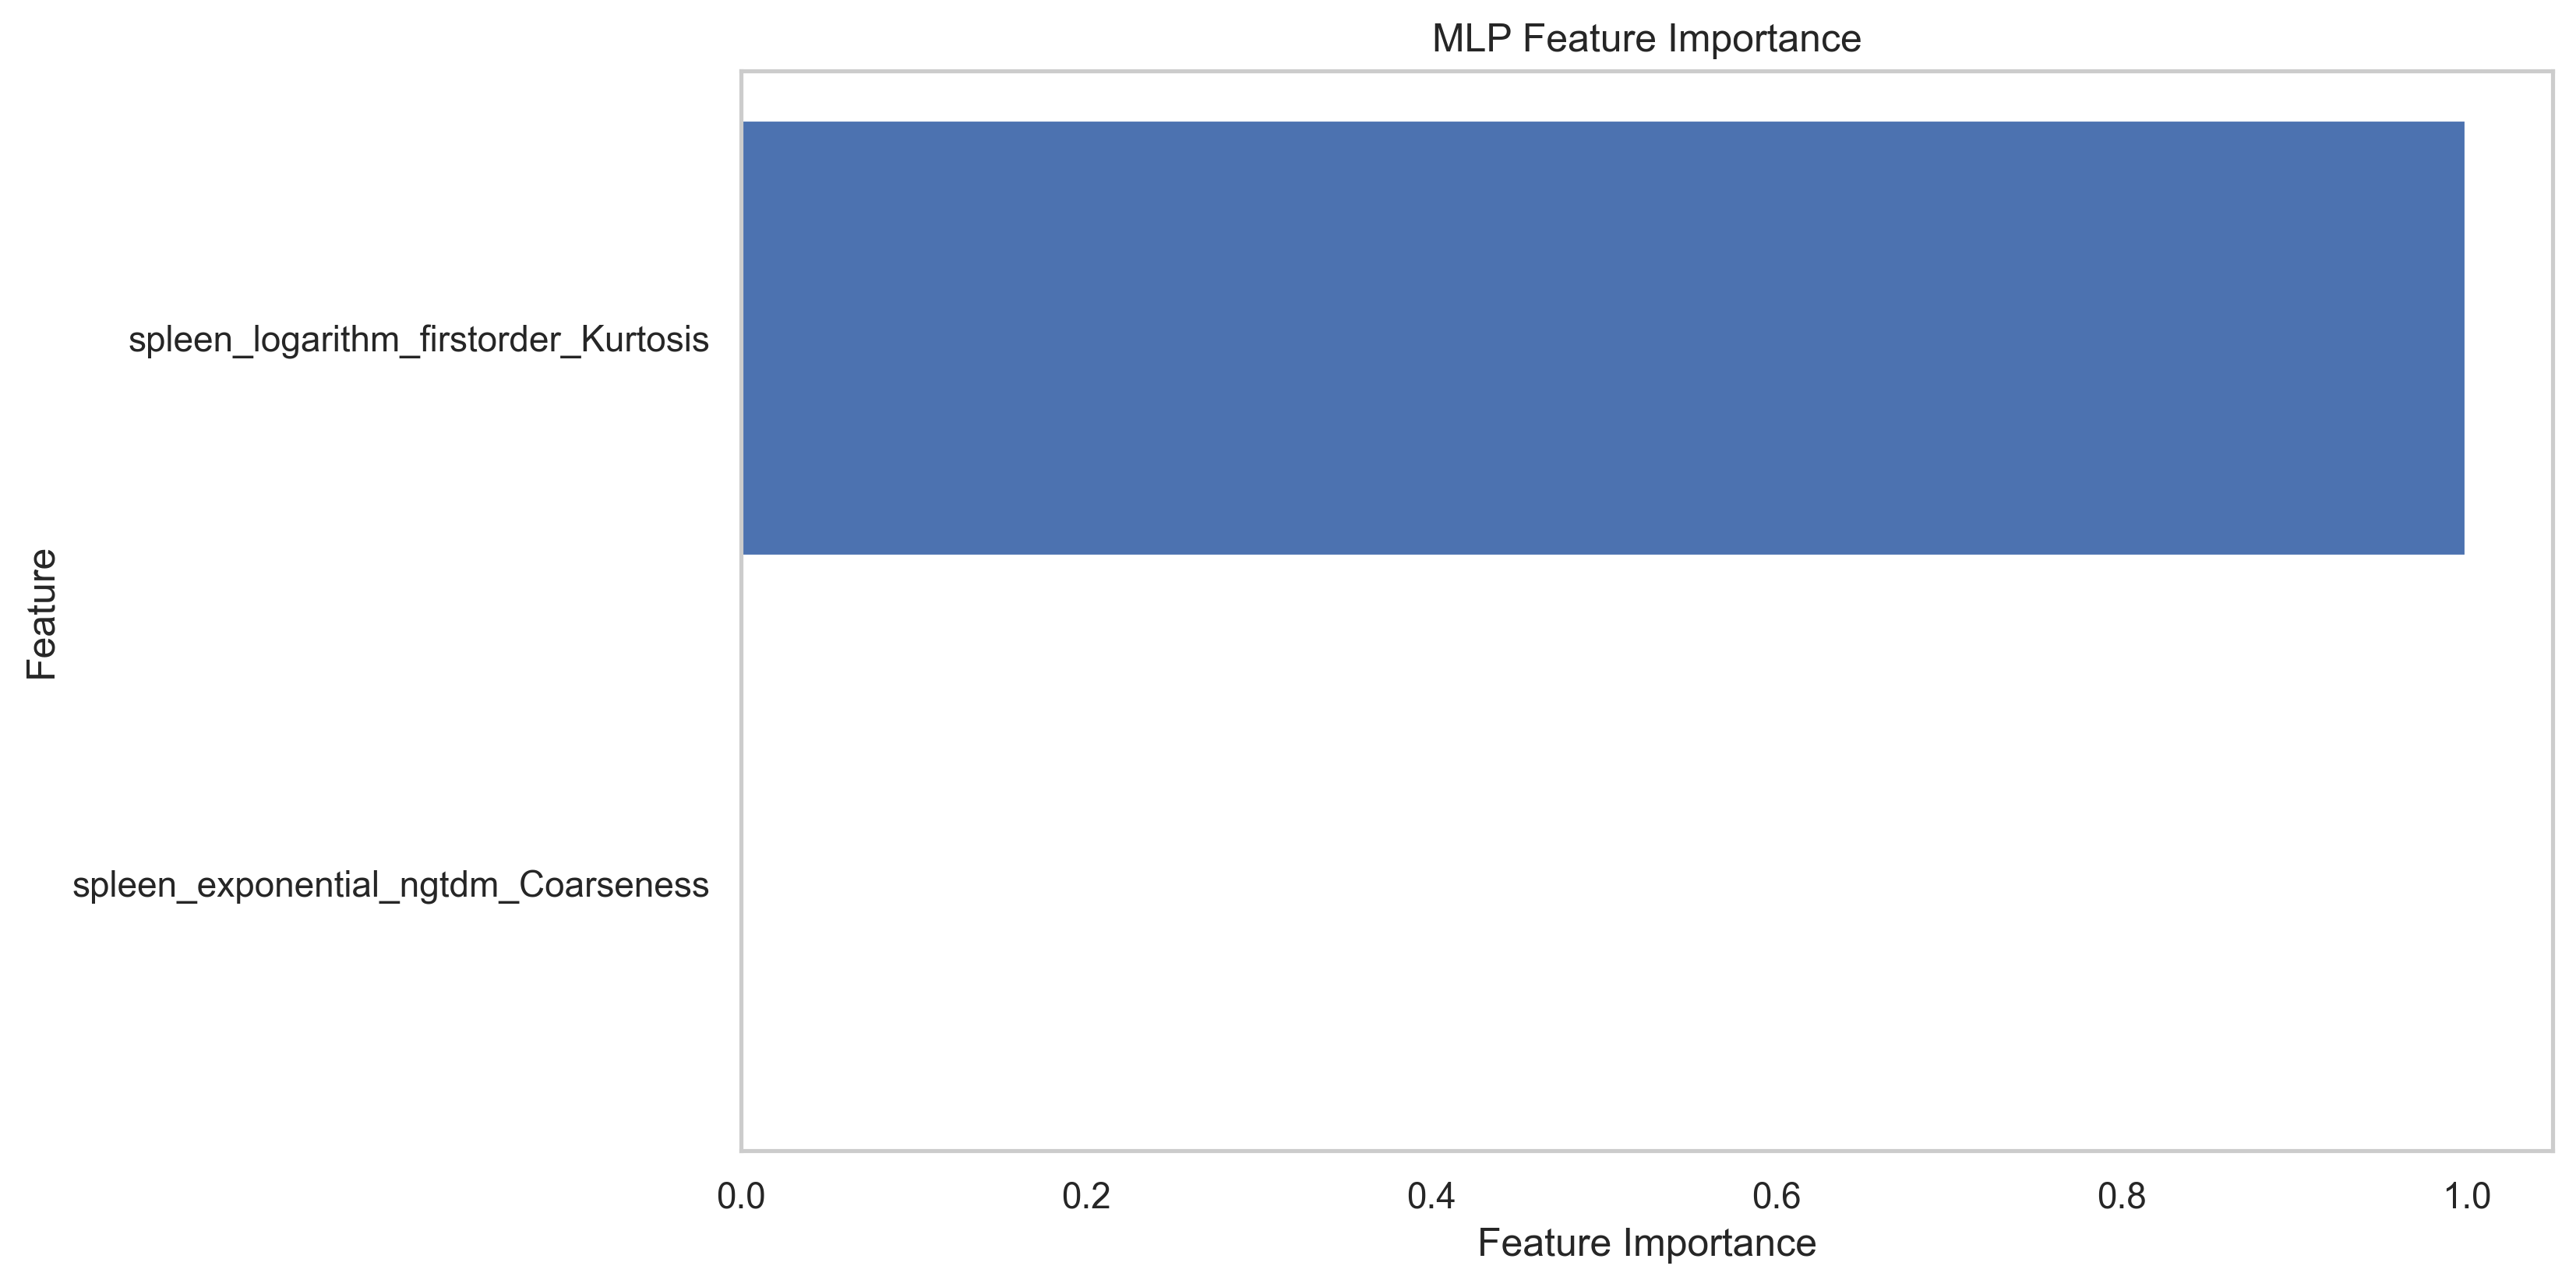

Plotting feature importance for GBM...


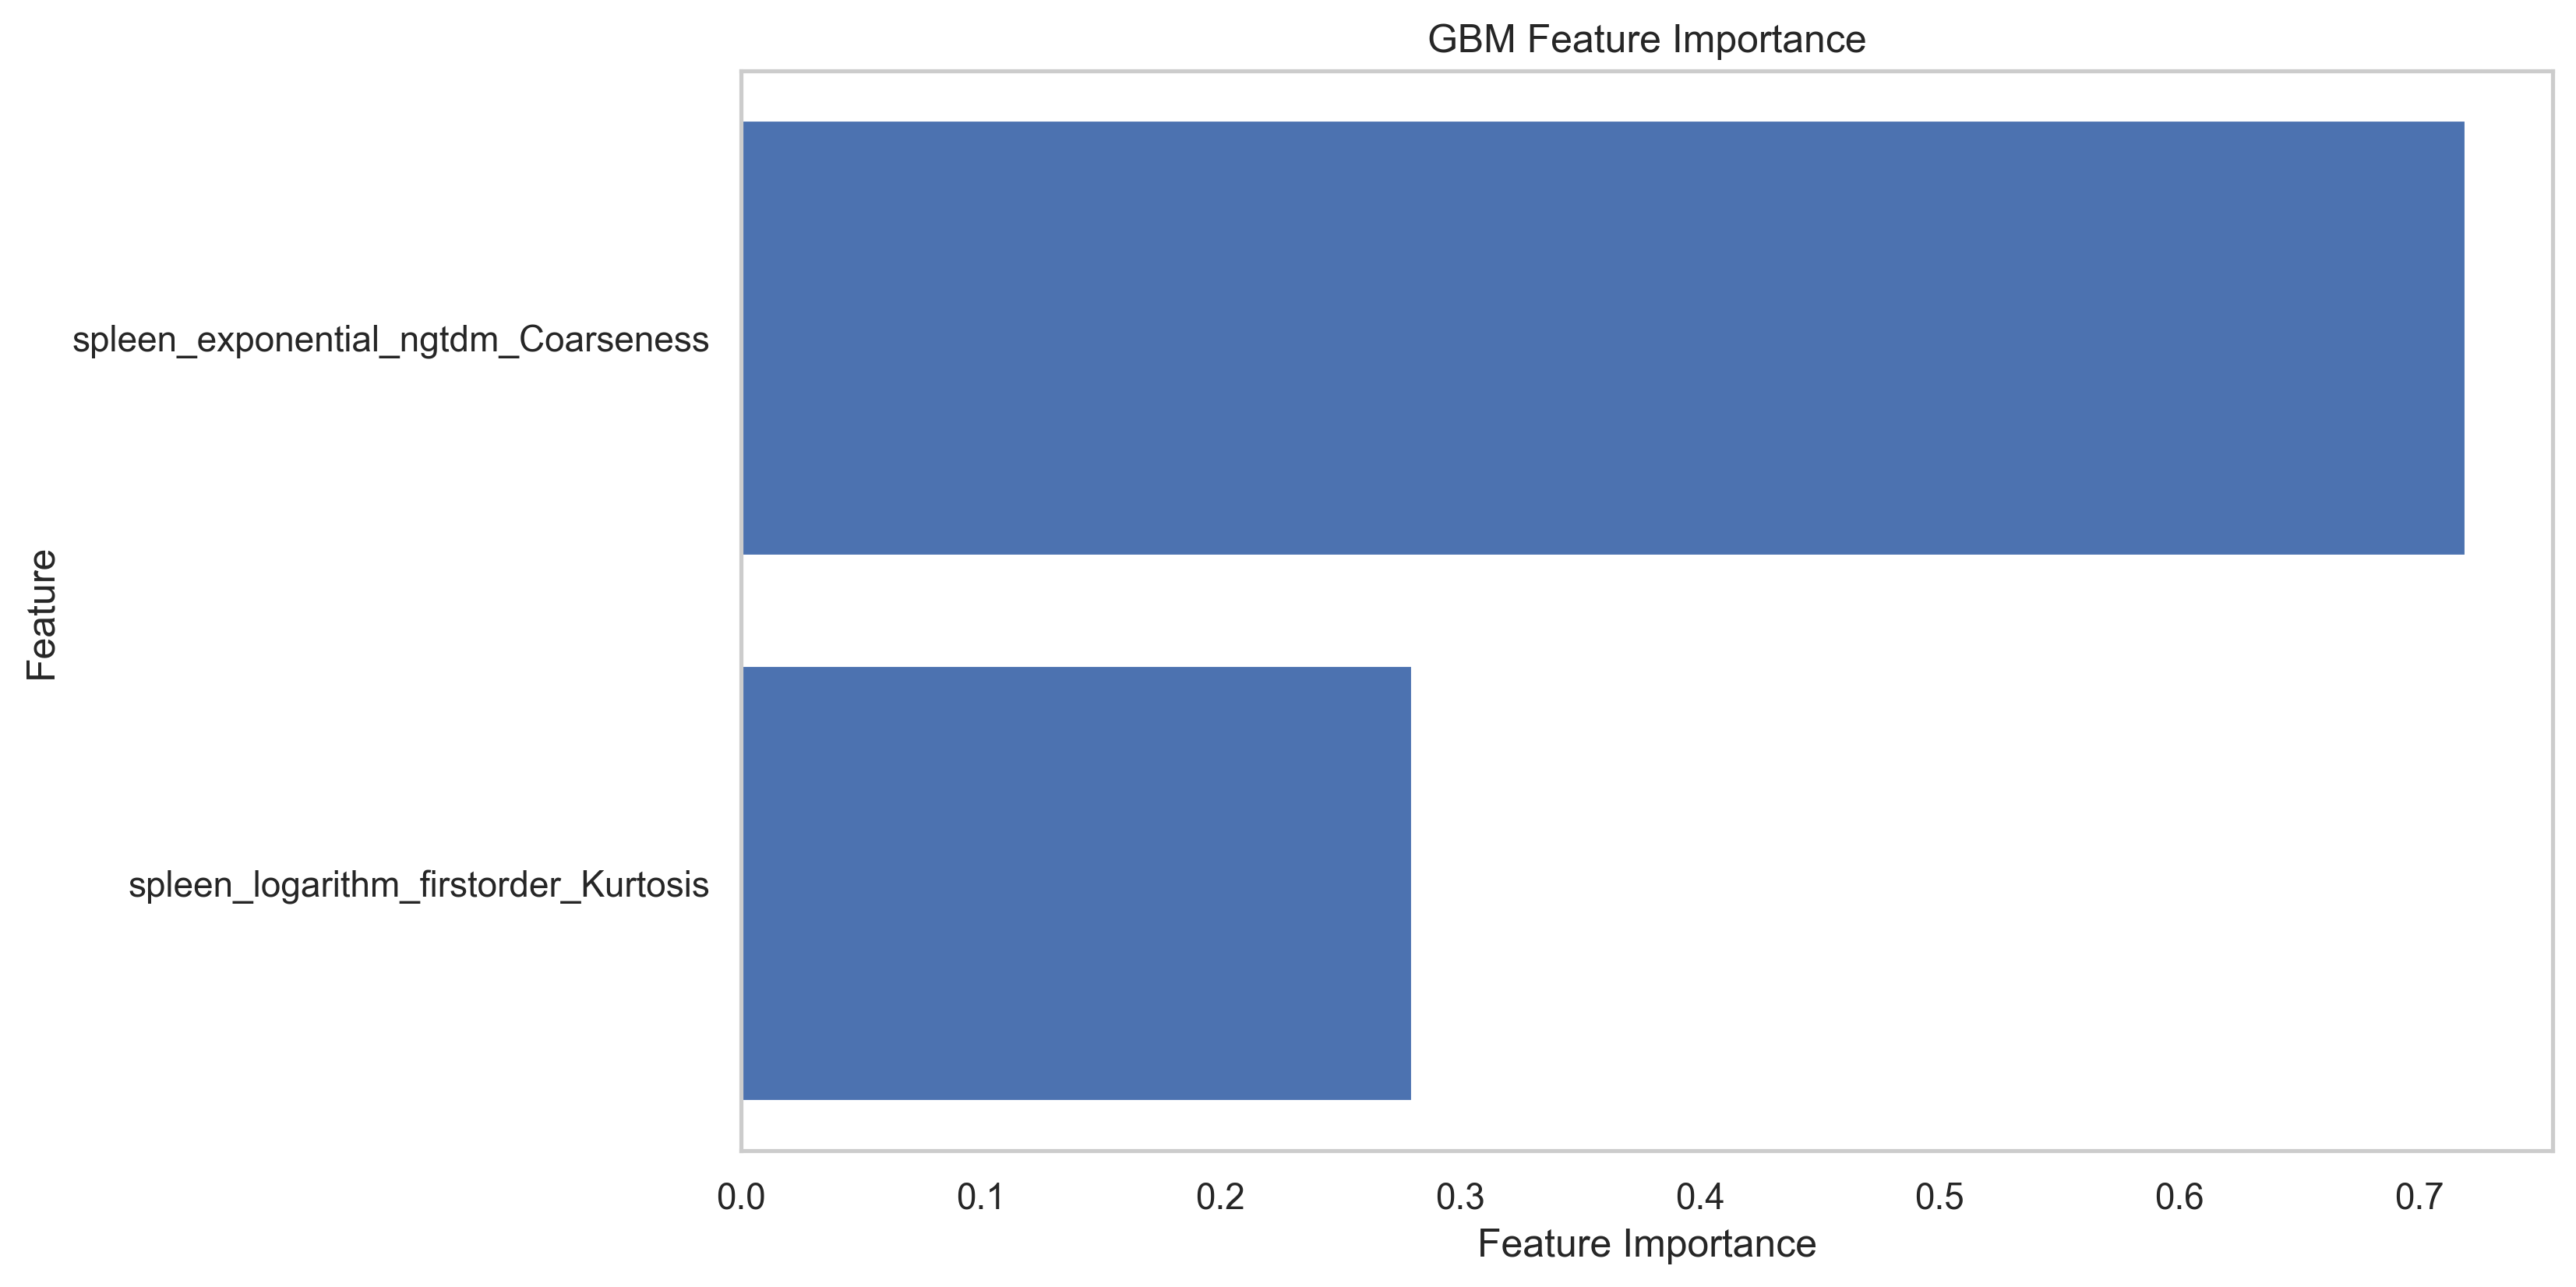

Plotting feature importance for LightGBM...


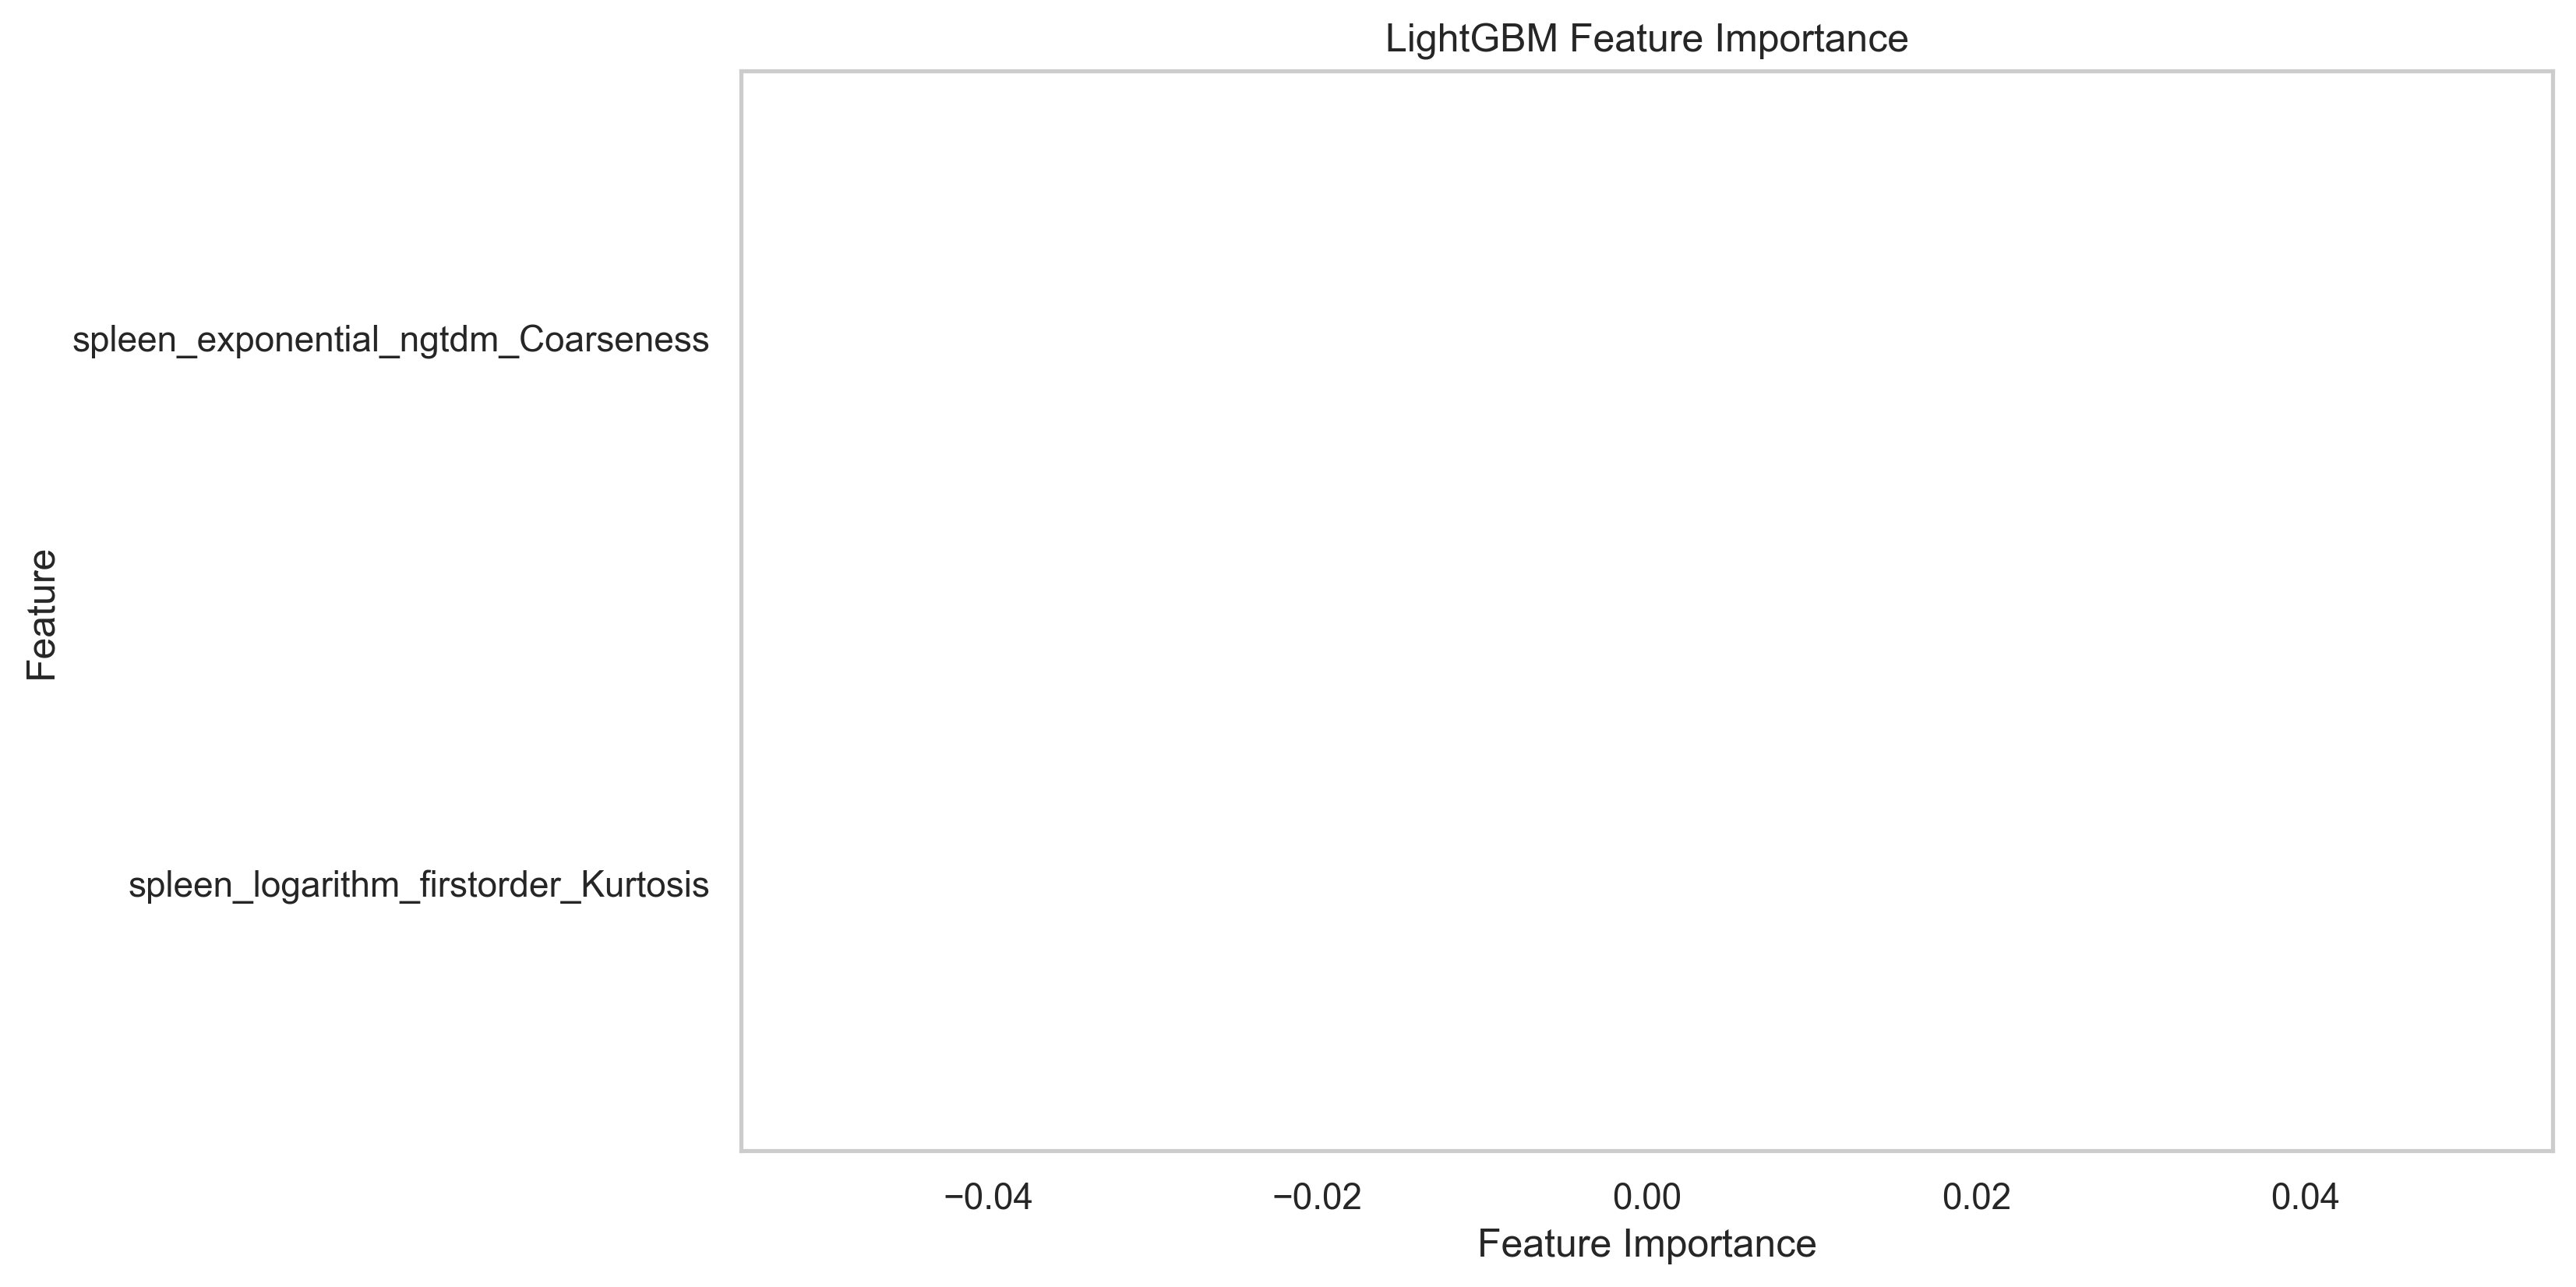

In [16]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
for name, model in models:
        print(f"Plotting feature importance for {name}...")
        feature_importance = None
        if hasattr(model, 'feature_importances_'):
            feature_importance = model.feature_importances_
        elif hasattr(model, 'coef_'):
            feature_importance = np.abs(model.coef_[0])
        else:
            result = permutation_importance(model, x_train, y_train, n_repeats=30, random_state=42, n_jobs=-1)
            feature_importance = result.importances_mean.argsort()
        
        feature_importance_df = pd.DataFrame({
            'Feature': x_train.columns,
            'Importance': feature_importance
        })
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
        
        plt.figure(figsize=(10, 6))
        plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
        plt.xlabel("Feature Importance")
        plt.ylabel("Feature")
        plt.title(f"{name} Feature Importance")
        plt.gca().invert_yaxis()
        plt.grid(False)
        plt.savefig(f"results/img/{name}_feature_importance.svg", bbox_inches='tight')
        plt.show()